# Image Classification: *Fashion MNIST* with `TensorFlow 2 + Keras` and Deep Learning -- *CNN*(Convolutional Neural Network) 
***
### The TensorFlow 2.0.0 Tutorials and Courses by Davis on 2019-11-6
#### Ref: https://www.tensorflow.org/tutorials/keras/classification
***

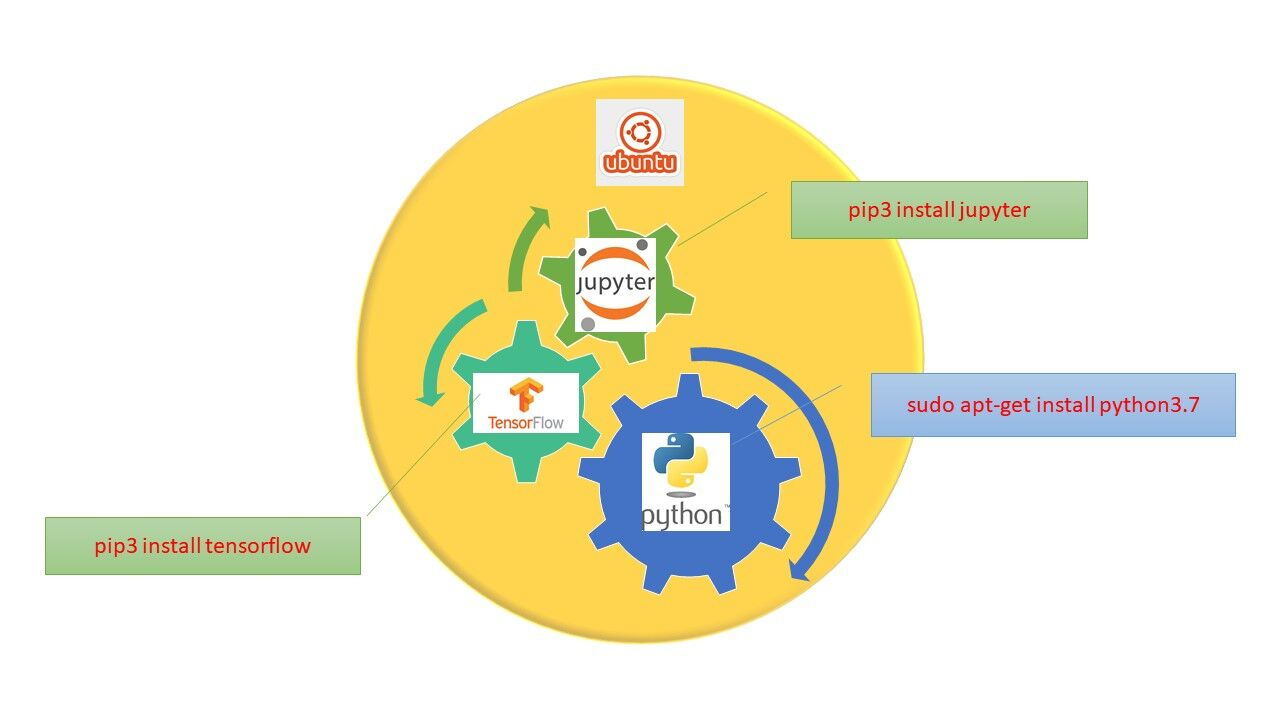
***

### `學習地圖：`
* [**快速**]：0-2, 1-1, 1-2, 1-7, 1-22, 2-2, 2-3, 2-6, 2-7, 2-18, 2-20, 2-21, 3-1, 3-2, 3-3, 3-4
* [**簡易**]：0-2, 1-1, 1-2, 1-3, 1-4, 1-7, 1-12, 1-13, 1-17, 1-18, 1-22, 1-28, 1-29, 1-30, 1-31, 1-32, 2-2, 2-3, 2-4, 2-5, 2-6, 2-7, 2-9, 2-12, 2-14, 2-18, 2-20, 2-21, 2-22, 2-23, 2-25, 3-1, 3-2, 3-3, 3-4
* [**困難**]：0-1, 0-2, 1-1, ... , 3-3, 3-4, 4-1, 4-2
***

In [1]:
# 檢查 python version
!python3.7 -V
# 0-1

Python 3.7.3


#### 參攷: https://www.python.org/

In [2]:
# 更新 The Python Package Installer — pip
# !pip3 install --user --upgrade pip
# !pip3 install --user -U tensorflow-gpu
# !pip3 install --user -U matplotlib
# !pip3 install --user -U jupyter
# !pip3 install --user -U numpy
!pip3 -V
# 0-2

pip 19.3.1 from /home/d1075102/.local/lib/python3.7/site-packages/pip (python 3.7)


#### 參攷: https://pip.pypa.io/en/stable/

***

### Outline
<table style="height: 100px; width: 100%; margin-left: auto; margin-right: auto;" border="2" cellpadding="3" cellspacing="1" style="border: 3px solid #FFAE7F; border-collapse: collapse;">
<tbody>
<tr>
<th style="background-color: #cceeff; text-align: center; width: 25%;"><font size=5>問題</font></th>
<th style="background-color: #e6ccff; text-align: center; width: 50%;"><font size=5>方法</font></th>
<th style="background-color: #fff5cc; text-align: center; width: 25%;"><font size=5>結果</font></th>
</tr>
<tr>
<td style="background-color: #cceeff; text-align: center; width: 25%; border: 2px dashed red; word-wrap:break-word;">
<font color=Orange size=4>
從一堆圖像資料中分辨其類別
</font>
&nbsp;
</td>
<td style="background-color: #e6ccff; text-align: center; width: 50%; border: 2px dashed red;">
<font color=Red size=4>
使用機器學習-深度學習--CNN模型<br />(建模、訓練、評估、預測)
</font>
&nbsp;
</td>
<td style="background-color: #fff5cc; text-align: center; width: 25%; border: 2px dashed red;">
<font color=Purple size=4>
圖片分類類別名稱
</font>
&nbsp;
</td>
</tr>
</tbody>
</table>

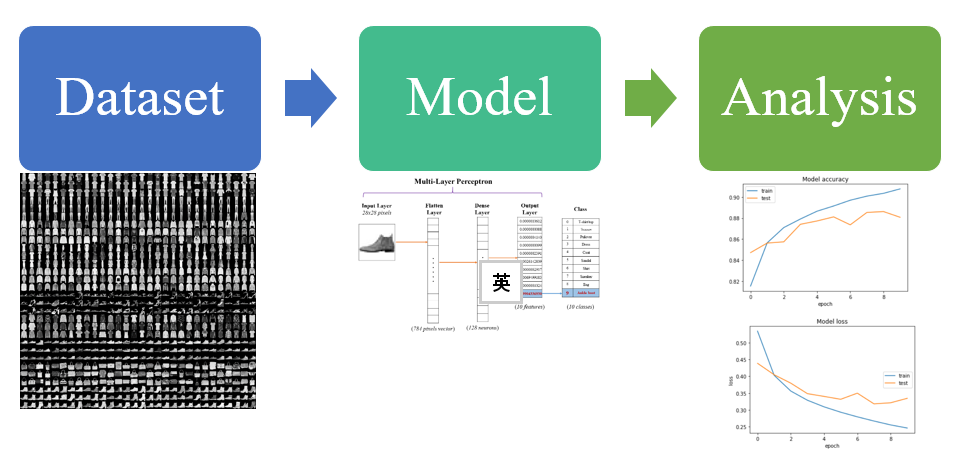

***

## Menu
1. [Dataset](#Dataset)
2. [Model](#Model)
3. [Analysis](#Analysis)

***

## 載入 python packages
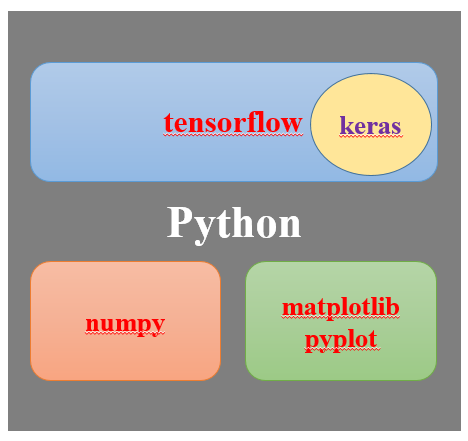

In [3]:
from __future__ import (absolute_import, division, print_function, unicode_literals)  # 參攷[1]

# TensorFlow and tf.keras
import tensorflow as tf          # 參攷[2]
from tensorflow import keras     # 參攷[3]
from tensorflow.keras import Sequential, models, callbacks, initializers, datasets, preprocessing
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPool2D, BatchNormalization, Activation
from tensorflow.keras.utils import plot_model, to_categorical
from tensorflow.keras.optimizers import Adam

print(tf.__version__)            # 查詢 TensorFlow版本
print(tf.version.VERSION)
print(keras.__version__)         # 查詢 keras 版本

# Helper libraries
import os
import gzip
import numpy as np               # 陣列運算的數學函數函式庫, 參攷[4]
import matplotlib.pyplot as plt  # 繪圖庫, 參攷[5]

import Ipynb_importer  # 參攷[6]
import tf2tools

# 將matplotlib的圖表直接嵌入到Notebook之中, 參攷[7]
%matplotlib inline
# 1-1

2.0.0
2.0.0
2.2.4-tf
importing Jupyter notebook from tf2tools.ipynb


#### 參攷:
1. https://python-future.org/quickstart.html
2. https://www.tensorflow.org/
3. https://www.tensorflow.org/guide/keras
4. https://numpy.org/
5. https://matplotlib.org/3.1.1/tutorials/introductory/pyplot.html
6. https://jupyter-notebook.readthedocs.io/en/latest/examples/Notebook/Importing%20Notebooks.html
7. https://www.tutorialspoint.com/jupyter/jupyter_notebook_plotting.htm

***

<font color=#ff99ff size=60><b>Dataset</b></font>
# Dataset
[Back](#Menu)

***

## Fashion MNIST dataset 簡介
* 由 *Zalando*(德國的時尚科技公司)旗下的研究部門提供(`參攷[1]`)
* 涵蓋 *10* 種類別(categories)、共 *70,000* 個不同商品的正面圖片(images)
* *訓練集/測試集*：*60,000 / 10,000* 的數據劃分(`參攷[2]`)
* __Fashion-MNIST__的大小(size)：*28x28 pixels* 的*灰階*(grayscale)圖片、深度為 *8* bits（灰階影像畫素：*0 - 255*, 0:代表黑色、255:代表白色)
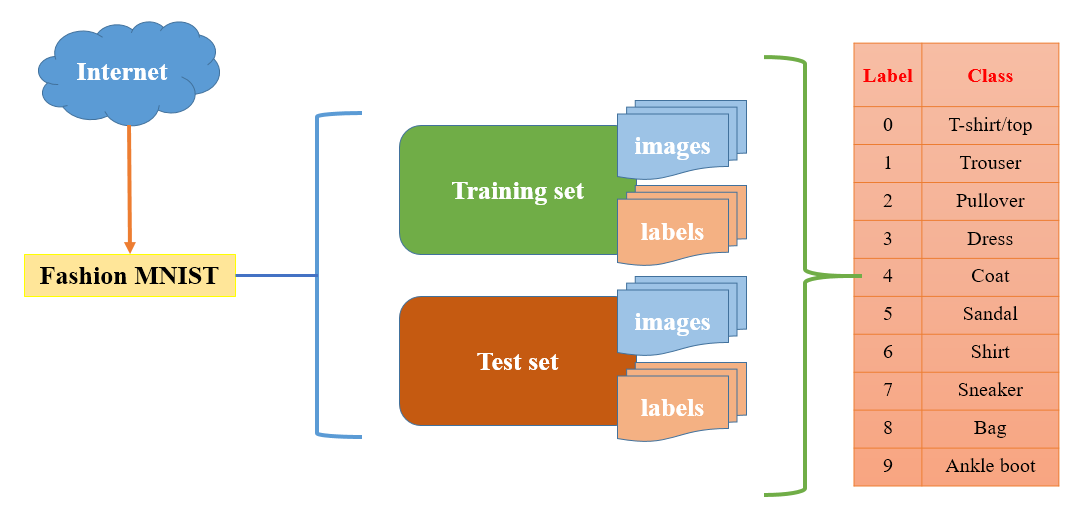

#### 參攷
1. https://research.zalando.com/welcome/mission/research-projects/fashion-mnist/
2. https://github.com/zalandoresearch/fashion-mnist

<table style="height: 100px; width: 100%; margin-left: auto; margin-right: auto;" border="2" cellpadding="3" cellspacing="1" style="border: 3px solid #FFAE7F; border-collapse: collapse;">
<tbody>
<tr>
<th style="background-color: #cceeff; text-align: center; width: 25%;"><font size=5>Input</font></th>
<th style="background-color: #e6ccff; text-align: center; width: 50%;"><font size=5>Process</font></th>
<th style="background-color: #fff5cc; text-align: center; width: 25%;"><font size=5>Output</font></th>
</tr>
<tr>
<td style="background-color: #cceeff; text-align: center; width: 25%; border: 2px dashed red; word-wrap:break-word;">
<font size=3>
'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
</font>
&nbsp;
</td>
<td style="background-color: #e6ccff; text-align: center; width: 50%; border: 2px dashed red;">
<font color=Red size=5>
[ ]
</font>
&nbsp;
</td>
<td style="background-color: #fff5cc; text-align: center; width: 25%; border: 2px dashed red;">
<font color=Purple size=5>
class_names
</font>
&nbsp;
</td>
</tr>
</tbody>
</table>

In [4]:
# 利用 List(串列), 建立 10 種類別, 參攷
class_names = ['T-shirt/top',  # 0: index
               'Trouser',      # 1
               'Pullover',     # 2
               'Dress',        # 3
               'Coat',         # 4
               'Sandal',       # 5
               'Shirt',        # 6
               'Sneaker',      # 7
               'Bag',          # 8
               'Ankle boot']   # 9
# 1-2

#### 參攷: https://docs.python.org/zh-tw/3/tutorial/datastructures.html#more-on-lists

<table style="height: 50px; width: 100%; margin-left: auto; margin-right: auto;" border="2" cellpadding="3" cellspacing="1" style="border: 3px solid #FFAE7F; border-collapse: collapse;">
<tbody>
<tr>
<th style="background-color: #cceeff; text-align: center; width: 25%;"><font size=5>Input</font></th>
<th style="background-color: #e6ccff; text-align: center; width: 50%;"><font size=5>Process</font></th>
<th style="background-color: #fff5cc; text-align: center; width: 25%;"><font size=5>Output</font></th>
</tr>
<tr>
<td style="background-color: #cceeff; text-align: center; width: 25%; border: 2px dashed red; word-wrap:break-word;">
<font size=5>
class_names
</font>
&nbsp;
</td>
<td style="background-color: #e6ccff; text-align: center; width: 50%; border: 2px dashed red;">
<font color=Red size=5>
print(len( ))
</font>
&nbsp;
</td>
<td style="background-color: #fff5cc; text-align: center; width: 25%; border: 2px dashed red;">
<font color=Purple size=5>
10
</font>
&nbsp;
</td>
</tr>
</tbody>
</table>

In [5]:
# 列出類別總數
print(len(class_names))
# 1-3

10


#### 參攷: https://docs.python.org/3/library/functions.html#len

<table style="height: 50px; width: 100%; margin-left: auto; margin-right: auto;" border="2" cellpadding="3" cellspacing="1" style="border: 3px solid #FFAE7F; border-collapse: collapse;">
<tbody>
<tr>
<th style="background-color: #cceeff; text-align: center; width: 25%;"><font size=5>Input</font></th>
<th style="background-color: #e6ccff; text-align: center; width: 50%;"><font size=5>Process</font></th>
<th style="background-color: #fff5cc; text-align: center; width: 25%;"><font size=5>Output</font></th>
</tr>
<tr>
<td style="background-color: #cceeff; text-align: center; width: 25%; border: 2px dashed red; word-wrap:break-word;">
<font size=5>
9
</font>
&nbsp;
</td>
<td style="background-color: #e6ccff; text-align: center; width: 50%; border: 2px dashed red;">
<font color=Red size=5>
class_names[ ]
</font>
&nbsp;
</td>
<td style="background-color: #fff5cc; text-align: center; width: 25%; border: 2px dashed red;">
<font color=Purple size=5>
'Ankle boot'
</font>
&nbsp;
</td>
</tr>
</tbody>
</table>

In [6]:
# 列出第 10 個(輸入: 數字), index 從 0 起算
class_names[9]
# 1-4

'Ankle boot'

<table style="height: 50px; width: 100%; margin-left: auto; margin-right: auto;" border="2" cellpadding="3" cellspacing="1" style="border: 3px solid #FFAE7F; border-collapse: collapse;">
<tbody>
<tr>
<th style="background-color: #cceeff; text-align: center; width: 25%;"><font size=5>Input</font></th>
<th style="background-color: #e6ccff; text-align: center; width: 50%;"><font size=5>Process</font></th>
<th style="background-color: #fff5cc; text-align: center; width: 25%;"><font size=5>Output</font></th>
</tr>
<tr>
<td style="background-color: #cceeff; text-align: center; width: 25%; border: 2px dashed red; word-wrap:break-word;">
<font size=5>
'Ankle boot'
</font>
&nbsp;
</td>
<td style="background-color: #e6ccff; text-align: center; width: 50%; border: 2px dashed red;">
<font color=Red size=5>
list(filter(lambda ... ))
</font>
&nbsp;
</td>
<td style="background-color: #fff5cc; text-align: center; width: 25%; border: 2px dashed red;">
<font color=Purple size=5>
res_list
</font>
&nbsp;
</td>
</tr>
</tbody>
</table>

In [7]:
# 使用 "關鍵字" 來搜尋
keyword = 'Ankle boot'

# using filter()
# to find indices
res_list = list(filter(lambda x: class_names[x] == keyword, range(len(class_names))))  # 參攷

# printing resultant
print("[" + keyword + "] is " + str(res_list[0]))
# 1-5

[Ankle boot] is 9


#### 參攷: https://docs.python.org/3/howto/functional.html#small-functions-and-the-lambda-expression

<table style="height: 50px; width: 100%; margin-left: auto; margin-right: auto;" border="2" cellpadding="3" cellspacing="1" style="border: 3px solid #FFAE7F; border-collapse: collapse;">
<tbody>
<tr>
<th style="background-color: #cceeff; text-align: center; width: 25%;"><font size=5>Input</font></th>
<th style="background-color: #e6ccff; text-align: center; width: 50%;"><font size=5>Process</font></th>
<th style="background-color: #fff5cc; text-align: center; width: 25%;"><font size=5>Output</font></th>
</tr>
<tr>
<td style="background-color: #cceeff; text-align: center; width: 25%; border: 2px dashed red; word-wrap:break-word;">
<font size=5>
class_names
</font>
&nbsp;
</td>
<td style="background-color: #e6ccff; text-align: center; width: 50%; border: 2px dashed red;">
<font color=Red size=5>
print( )
</font>
&nbsp;
</td>
<td style="background-color: #fff5cc; text-align: center; width: 25%; border: 2px dashed red; word-wrap:break-word;">
<font color=Purple size=3>
['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']
</font>
&nbsp;
</td>
</tr>
</tbody>
</table>

In [8]:
# 列出所有類別名稱
class_names
# 1-6

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

***

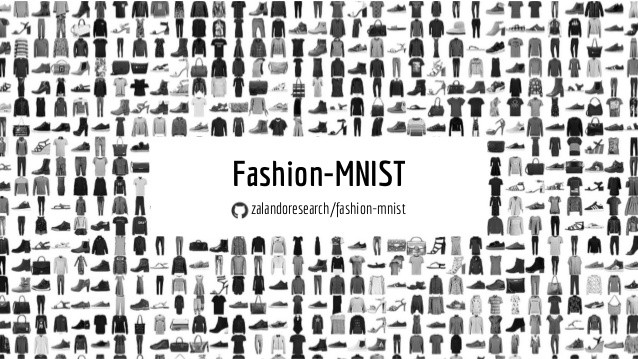

<table style="height: 50px; width: 100%; margin-left: auto; margin-right: auto;" border="2" cellpadding="3" cellspacing="1" style="border: 3px solid #FFAE7F; border-collapse: collapse;">
<tbody>
<tr>
<th style="background-color: #cceeff; text-align: center; width: 25%;"><font size=5>Input</font></th>
<th style="background-color: #e6ccff; text-align: center; width: 50%;"><font size=5>Process</font></th>
<th style="background-color: #fff5cc; text-align: center; width: 25%;"><font size=5>Output</font></th>
</tr>
<tr>
<td style="background-color: #cceeff; text-align: center; width: 25%; border: 2px dashed red; word-wrap:break-word;">
<font size=5>
fashion_mnist
</font>
&nbsp;
</td>
<td style="background-color: #e6ccff; text-align: center; width: 50%; border: 2px dashed red;">
<font color=Red size=5>
.load_data()
</font>
&nbsp;
</td>
<td style="background-color: #fff5cc; text-align: center; width: 25%; border: 2px dashed red; word-wrap:break-word;">
<font color=Purple size=3>
(train_images, train_labels), (test_images, test_labels)
</font>
&nbsp;
</td>
</tr>
</tbody>
</table>

In [9]:
# 下載 並 載入 Fashion-MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()  # 參攷[1]
# 1-7

#### 參攷: 
1. https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data
2. https://docs.python.org/zh-tw/3/tutorial/datastructures.html#tuples-and-sequences

## train_images = [圖片a, 圖片b, 圖片c ...]
## train_labels   = [數字a, 數字b, 數字c ...]

1. `提取資料（Extract）`：將資料從**容器**（硬碟、雲端等）提取
2. `轉換資料（Transform）`：將資料轉換為模型可讀取的資料，同時進行**數據清理**等預處理
3. `裝載資料（Load）`：將處理好的資料裝載至**加速器**（GPU）

In [10]:
# 秀出 Fashion-MNIST 檔案下載的位置
!ls ~/.keras/datasets/fashion-mnist/*ubyte.gz

#!dir %userprofile%\.keras\datasets\fashion-mnist  # for windows
# 1-8

/home/d1075102/.keras/datasets/fashion-mnist/t10k-images-idx3-ubyte.gz
/home/d1075102/.keras/datasets/fashion-mnist/t10k-labels-idx1-ubyte.gz
/home/d1075102/.keras/datasets/fashion-mnist/train-images-idx3-ubyte.gz
/home/d1075102/.keras/datasets/fashion-mnist/train-labels-idx1-ubyte.gz


#### 參攷: https://support.anaconda.com/hc/en-us/articles/360023858254-Executing-Terminal-Commands-in-Jupyter-Notebooks
* train-images-idx3-ubyte.gz   `60,000` 張訓練集**圖片**
* train-labels-idx1-ubyte.gz   `60,000` 張訓練集圖片對應的**標籤**
* t10k-images-idx3-ubyte.gz    `10,000` 張測試集**圖片**
* t10k-labels-idx1-ubyte.gz    `10,000` 張測試集圖片對應的**標籤**

## THE MNIST DATABASE
#### sites: http://yann.lecun.com/exdb/mnist/
### 二進位文件的儲存格式
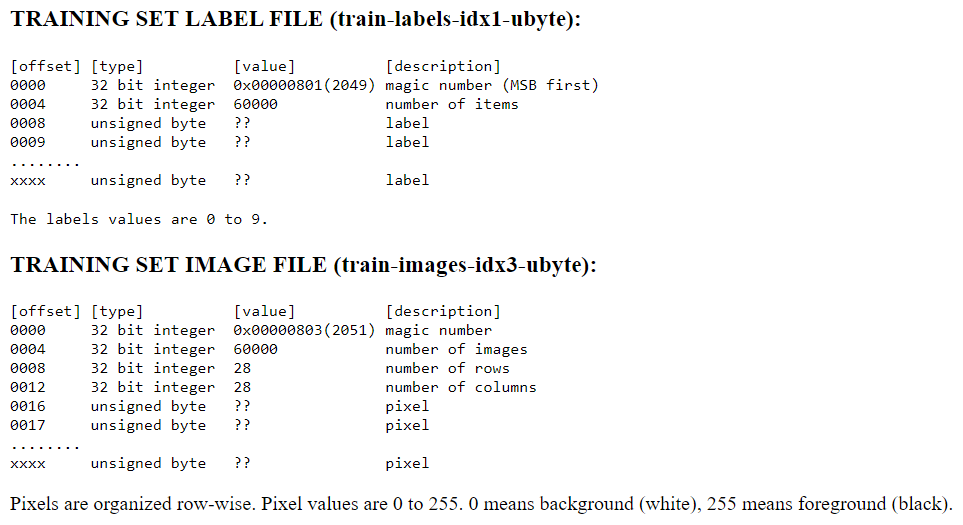

<table style="height: 163px; width: 100%; border-collapse: collapse; border-style: none;" border="0">
  <tbody>
    <tr style="height: 163px;">
        <td style="width: 20%; height: 163px;"><font color=#ff6347 size=4>讀取(open)訓練集圖像檔案</font></td>
      <td style="width: 5%; text-align: center; height: 163px;"><span style="color: #ff0000;"><strong>&rArr;</strong></span></td>
      <td style="width: 15%; height: 163px;"><font color=#ee82ee size=4>
        <p>[:4] magic number</p>
        <p>[4:8] number of images</p>
        <p>[8:12] number of rows</p>
        <p>[12:16] number of columns</p></font>
      </td>
      <td style="width: 5%; text-align: center; height: 163px;"><strong><span style="color: #ff0000;">&rArr;</span></strong></td>
      <td style="width: 14%; height: 163px;"><font color=#ffa500 size=4>
        <p>擷取第１張圖片的像素</p>
        <p>[16: 16+784] pixel</p></font>
      </td>
      <td style="width: 7%; text-align: center; height: 163px;"><span style="color: #ff0000;"><strong>&rArr;</strong></span></td>
      <td style="width: 22%; height: 163px;"><font color=#ff7f50 size=4>
        <p>利用numpy和cv2轉換格式</p>
        <p>並保存(cv2.imwrite)成.jpg格式的圖片</p></font>
      </td>
    </tr>
  </tbody>
</table>

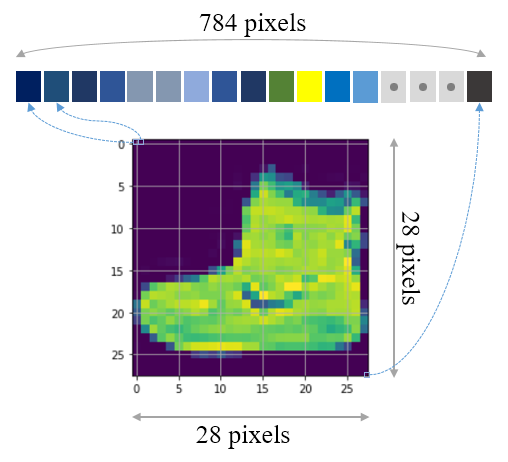

In [11]:
# !pip3 install --user -U pathlib
from pathlib import Path
# to get the home directory
home = str(Path.home())

# 以訓練集圖像文件 train-images-idx3-ubyte 為例
ubytefile = home + '/.keras/datasets/fashion-mnist/train-images-idx3-ubyte'

# 解壓.gz
tf2tools.un_gz(ubytefile + '.gz')

# 使用open()函數打開文件，並使用read()方法將所有的文件數據讀入到一個字串中
with open(ubytefile, 'rb') as f:
    trfile = f.read()  # file是str類型，其中的每個元素是存儲的1個byte的內容

magic_number = trfile[:4]           # 查看前4個bytes，即magic number的內容，是否是2051
print(magic_number)                 # Binary
print(magic_number.hex())           # Hexadecimal, hex
print(int(magic_number.hex(), base=16))  # 轉 Decimal, dec
print()  ##

num_images = int(trfile[4:8].hex(), base=16)  # 查看圖像數量
print('Number of images: {}'.format(num_images))  # 參攷[1]
h_image = int(trfile[8:12].hex(), base=16)    # 圖像高度
print('Height of image: {}'.format(h_image))
w_image = int(trfile[12:16].hex(), base=16)   # 圖像寬度
print('Width of image: {}'.format(w_image))
print()  ##

# 擷取第1張圖片的像素
image1 = [item for item in trfile[16 : 16 + 784]]
print('Pixel of image: {}'.format(len(image1)))

import cv2
# 利用numpy和cv2轉換其格式，並保存成.jpg格式的圖片
image1_np = np.array(image1, dtype=np.uint8).reshape(28, 28, 1)
# 圖片大小: nH(高)×nW(寬)×nC(通道數channel), 彩色圖片的nC數為3(三原色RGB)、灰階圖片nC數=1, 參攷[2]
print('Shape of image: {}'.format(image1_np.shape))

cv2.imwrite('image1.jpg', image1_np)  # 參攷[3]
# 1-9

b'\x00\x00\x08\x03'
00000803
2051

Number of images: 60000
Height of image: 28
Width of image: 28

Pixel of image: 784
Shape of image: (28, 28, 1)


True

#### 參攷: 
1. https://docs.python.org/3/library/stdtypes.html#str.format
2. https://docs.scipy.org/doc/numpy/reference/generated/numpy.array.html
3. https://docs.opencv.org/master/d4/da8/group__imgcodecs.html#gabbc7ef1aa2edfaa87772f1202d67e0ce

<table style="height: 50px; width: 100%; margin-left: auto; margin-right: auto;" border="2" cellpadding="3" cellspacing="1" style="border: 3px solid #FFAE7F; border-collapse: collapse;">
<tbody>
<tr>
<th style="background-color: #cceeff; text-align: center; width: 25%;"><font size=5>Input</font></th>
<th style="background-color: #e6ccff; text-align: center; width: 50%;"><font size=5>Process</font></th>
<th style="background-color: #fff5cc; text-align: center; width: 25%;"><font size=5>Output</font></th>
</tr>
<tr>
<td style="background-color: #cceeff; text-align: center; width: 25%; border: 2px dashed red; word-wrap:break-word;">
<font size=5>
'image1.jpg'
</font>
&nbsp;
</td>
<td style="background-color: #e6ccff; text-align: center; width: 50%; border: 2px dashed red;">
<font color=Red size=5>
mpimg.imread( )
</font>
&nbsp;
</td>
<td style="background-color: #fff5cc; text-align: center; width: 25%; border: 2px dashed red; word-wrap:break-word;">
<font color=Purple size=5>
boot
</font>
&nbsp;
</td>
</tr>
</tbody>
</table>

(28, 28)
<class 'numpy.ndarray'>


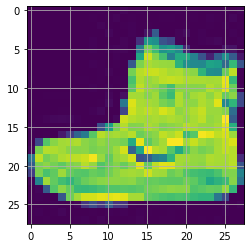

In [12]:
# 秀出 上述解壓後之圖片 image1.jpg
# import matplotlib.pyplot as plt    # plt 用於顯示圖片
import matplotlib.image as mpimg     # mpimg 用於讀取圖片, 參攷

boot = mpimg.imread('image1.jpg')    # 讀取 .jpg 成為 numpy.ndarray
print(boot.shape)  # (28, 28)
print(type(boot))

tf2tools.plot_image(boot)
# 1-10

#### 參攷: https://matplotlib.org/3.1.1/tutorials/introductory/images.html


<font color=#ff0000 size=30><b>Don't do this cell</b>&#8681;</font>

In [ ]:
''' ***請勿執行***請勿執行***請勿執行*** '''
# 將MNIST數據集保存成.jpg圖片格式: ubyte=>jpg
''' 將二進制格式的 Fashion-MNIST 數據集轉成 .jpg圖片 格式並保存，圖片標籤包含在圖片檔名中 '''
import numpy as np
import cv2
import codecs
from pathlib import Path
# to get the home directory
home = str(Path.home())

def save_mnist_to_jpg(mnist_image_file, mnist_label_file, save_dir):
    if 'train' in os.path.basename(mnist_image_file):  # 參攷[1]
        num_file = 60000
        prefix = 'train'
    else:
        num_file = 10000
        prefix = 'test'

    with open(mnist_image_file, 'rb') as f1:  # 參攷[2]
        image_file = f1.read()
    with open(mnist_label_file, 'rb') as f2:
        label_file = f2.read()

    image_file = image_file[16:]
    label_file = label_file[8:]

    for i in range(num_file):
        label = label_file[i]
        image_list = [item for item in image_file[i * 784 : i * 784 + 784]]
        image_np = np.array(image_list, dtype=np.uint8).reshape(28, 28, 1)
        save_name = os.path.join(save_dir, '{}_{}_{}.jpg'.format(prefix, i, label))  # 參攷[3]
        cv2.imwrite(save_name, image_np)
        print('{} ==> {}_{}_{}.jpg'.format(i, prefix, i, label))

train_image_file = home + '/.keras/datasets/fashion-mnist/train-images-idx3-ubyte'
train_label_file = home + '/.keras/datasets/fashion-mnist/train-labels-idx1-ubyte'
test_image_file = home + '/.keras/datasets/fashion-mnist/t10k-images-idx3-ubyte'
test_label_file = home + '/.keras/datasets/fashion-mnist/t10k-labels-idx1-ubyte'

save_train_dir = home + '/.keras/datasets/fashion-mnist/train_images/'
save_test_dir = home + '/.keras/datasets/fashion-mnist/test_images/'

if not os.path.exists(save_train_dir):  # 參攷[4]
    os.makedirs(save_train_dir)
if not os.path.exists(save_test_dir):
    os.makedirs(save_test_dir)

save_mnist_to_jpg(train_image_file, train_label_file, save_train_dir)
save_mnist_to_jpg(test_image_file, test_label_file, save_test_dir)
# 1-11

#### 參攷: 
1. https://docs.python.org/3/library/os.path.html#os.path.basename
2. https://docs.python.org/3/library/functions.html#open
3. https://docs.python.org/3/library/os.path.html#os.path.join
4. https://docs.python.org/3/library/os.path.html#os.path.exists

***

## Training set

* training set = 60,000 images
* each image represented as 28 x 28 pixels

<table style="height: 50px; width: 100%; margin-left: auto; margin-right: auto;" border="2" cellpadding="3" cellspacing="1" style="border: 3px solid #FFAE7F; border-collapse: collapse;">
<tbody>
<tr>
<th style="background-color: #cceeff; text-align: center; width: 25%;"><font size=5>Input</font></th>
<th style="background-color: #e6ccff; text-align: center; width: 50%;"><font size=5>Process</font></th>
<th style="background-color: #fff5cc; text-align: center; width: 25%;"><font size=5>Output</font></th>
</tr>
<tr>
<td style="background-color: #cceeff; text-align: center; width: 25%; border: 2px dashed red; word-wrap:break-word;">
<font size=5>
train_images.shape
</font>
&nbsp;
</td>
<td style="background-color: #e6ccff; text-align: center; width: 50%; border: 2px dashed red;">
<font color=Red size=5>
print( )
</font>
&nbsp;
</td>
<td style="background-color: #fff5cc; text-align: center; width: 25%; border: 2px dashed red; word-wrap:break-word;">
<font color=Purple size=5>
(60000, 28, 28)
</font>
&nbsp;
</td>
</tr>
</tbody>
</table>

In [13]:
# 秀出 張量tensor: (張數, 圖高, 圖寬)
print(train_images.shape)  # shape函數表示張量的形狀, 參攷[1]
print(train_images.dtype)  # data type, 參攷[2]
print(type(train_images))  # 參攷[3]
# 1-12

(60000, 28, 28)
uint8
<class 'numpy.ndarray'>


#### 參攷:
1. https://www.tensorflow.org/api_docs/python/tf/shape
2. https://www.tensorflow.org/api_docs/python/tf/Tensor#dtype
3. https://docs.python.org/3/library/functions.html#type

<table style="height: 50px; width: 100%; margin-left: auto; margin-right: auto;" border="2" cellpadding="3" cellspacing="1" style="border: 3px solid #FFAE7F; border-collapse: collapse;">
<tbody>
<tr>
<th style="background-color: #cceeff; text-align: center; width: 25%;"><font size=5>Input</font></th>
<th style="background-color: #e6ccff; text-align: center; width: 50%;"><font size=5>Process</font></th>
<th style="background-color: #fff5cc; text-align: center; width: 25%;"><font size=5>Output</font></th>
</tr>
<tr>
<td style="background-color: #cceeff; text-align: center; width: 25%; border: 2px dashed red; word-wrap:break-word;">
<font size=5>
len(train_labels)
</font>
&nbsp;
</td>
<td style="background-color: #e6ccff; text-align: center; width: 50%; border: 2px dashed red;">
<font color=Red size=5>
print( )
</font>
&nbsp;
</td>
<td style="background-color: #fff5cc; text-align: center; width: 25%; border: 2px dashed red; word-wrap:break-word;">
<font color=Purple size=5>
60000
</font>
&nbsp;
</td>
</tr>
</tbody>
</table>

In [14]:
# 秀出 資料量
print(len(train_labels))  # 參攷[1]
print(train_labels.size)  # 參攷[2]
# 1-13

60000
60000


#### 參攷:
1. https://docs.python.org/3/library/functions.html#len
2. https://www.tensorflow.org/api_docs/python/tf/size

<table style="height: 50px; width: 100%; margin-left: auto; margin-right: auto;" border="2" cellpadding="3" cellspacing="1" style="border: 3px solid #FFAE7F; border-collapse: collapse;">
<tbody>
<tr>
<th style="background-color: #cceeff; text-align: center; width: 25%;"><font size=5>Input</font></th>
<th style="background-color: #e6ccff; text-align: center; width: 50%;"><font size=5>Process</font></th>
<th style="background-color: #fff5cc; text-align: center; width: 25%;"><font size=5>Output</font></th>
</tr>
<tr>
<td style="background-color: #cceeff; text-align: center; width: 25%; border: 2px dashed red; word-wrap:break-word;">
<font size=5>
train_labels
</font>
&nbsp;
</td>
<td style="background-color: #e6ccff; text-align: center; width: 50%; border: 2px dashed red;">
<font color=Red size=5>
type( )
</font>
&nbsp;
</td>
<td style="background-color: #fff5cc; text-align: center; width: 25%; border: 2px dashed red; word-wrap:break-word;">
<font color=Purple size=5>
numpy.ndarray
</font>
&nbsp;
</td>
</tr>
</tbody>
</table>

In [15]:
# 秀出 屬性
type(train_labels)
# An array object represents a multidimensional, homogeneous array of fixed-size items.
# ndarray資料結構: 只容許一種資料類型，
#                 如果同時儲存有數值，布林值，會被自動轉換為數值，
#                 如果同時儲存有數值，布林值與文字，會被自動轉換為文字
# 1-14

numpy.ndarray

#### 參攷: https://docs.python.org/3/library/functions.html#type

In [16]:
# 秀出 資料量
len(train_labels)
# 1-15

60000

In [17]:
# 秀出 label 內容, Each label is an integer between 0 and 9:
train_labels
# 1-16

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

## Test set

* test set = 10,000 images
* each image represented as 28 x 28 pixels

In [18]:
# 秀出 張量tensor: (張數, 圖高, 圖寬)
test_images.shape  # shape函數表示張量的形狀
# 1-17

(10000, 28, 28)

In [19]:
# 秀出 資料量
len(test_labels)
# 1-18

10000

In [20]:
# 秀出 28x28 維的 灰階畫素位元值: 0-255
print(train_images[0])
# 1-19

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

#### 參攷: https://docs.python.org/3/library/functions.html#print

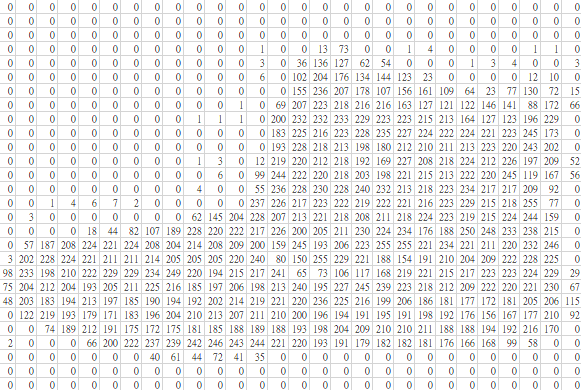

(28, 28)


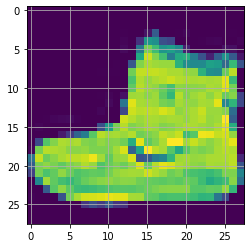

In [21]:
# 秀出 第一張訓練圖像
img = train_images[0]
print(img.shape)  # tensor: (圖高height, 圖寬width)

tf2tools.plot_image(img)
# 1-20

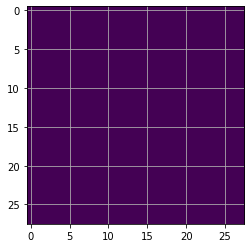

In [22]:
''' ***請勿執行***請勿執行***請勿執行*** '''
# 畫一張全黑的圖片, 0代表著黑色，255代表白色
# np.zeros 產生給定維度 用0填充 的陣列(數組)
black_zeros_array = np.zeros((28, 28), dtype='float')

# print(black_zeros_array)

tf2tools.plot_image(black_zeros_array)
# 1-21

#### 參攷: https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.zeros.html

## Preprocess the data

將 (上面的圖片畫素值 / *255*)：除 *255* 之後，本來 [*0-255*] 的值就會變成 [*0-1*]，但數值的分佈比例還是一樣的，在機器學習中，通常用正規化，把值變成 [*0-1*]，方便訓練及提高準確率

In [23]:
# normalizing
train_images = train_images / 255.  # dtype=float64

test_images = test_images / 255.0

print(train_images.dtype)
# 1-22

float64


#### 參攷: https://machinelearningmastery.com/how-to-manually-scale-image-pixel-data-for-deep-learning/

In [24]:
train_images[0]
# 1-23

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
# 秀出100張訓練集圖片(含label)
# tf2tools.plot_images(train_images, train_labels)
# 1-24

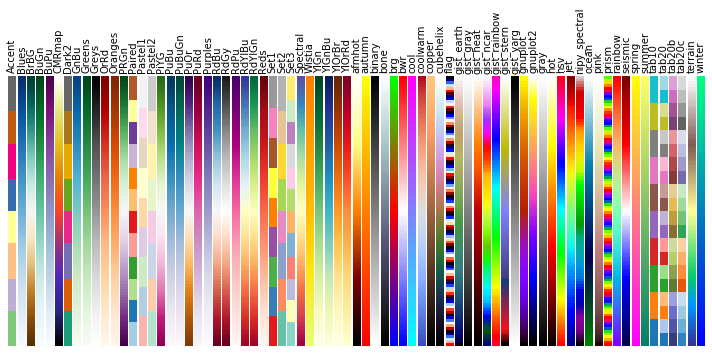

In [25]:
''' ***請勿執行***請勿執行***請勿執行*** '''
# Show Matplotlib colormaps
from pylab import *
from numpy import outer

rc('text', usetex=False)
a = outer(arange(0, 1, 0.01), ones(10))
plt.figure(figsize=(10, 5))
subplots_adjust(top=0.8, bottom=0.05, left=0.01, right=0.99)
maps=[m for m in cm.datad if not m.endswith("_r")]
maps.sort()
l = len(maps) + 1

for i, m in enumerate(maps):
    plt.subplot(1, l, i + 1)
    plt.axis("off")
    plt.imshow(a, aspect='auto', cmap=get_cmap(m), origin="lower")
    plt.title(m, rotation=90, fontsize=10)

# plt.savefig("colormaps.png", dpi=100, facecolor='gray')  # 保存為png格式
plt.show()
# 1-25

#### 參攷: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

***

## Keras ImageDataGenerator and Data Augmentation
### 使用keras中的方法對圖像進行增強，例如：旋轉、裁剪、灰階化、平移、仿射變換...等
#### 參攷: https://keras.io/preprocessing/image/

<table style="height: 50px; width: 100%; margin-left: auto; margin-right: auto;" border="2" cellpadding="3" cellspacing="1" style="border: 3px solid #FFAE7F; border-collapse: collapse;">
<tbody>
<tr>
<th style="background-color: #cceeff; text-align: center; width: 25%;"><font size=5>Input</font></th>
<th style="background-color: #e6ccff; text-align: center; width: 50%;"><font size=5>Process</font></th>
<th style="background-color: #fff5cc; text-align: center; width: 25%;"><font size=5>Output</font></th>
</tr>
<tr>
<td style="background-color: #cceeff; text-align: center; width: 25%; border: 2px dashed red; word-wrap:break-word;">
<font size=5>
train_images
</font>
&nbsp;
</td>
<td style="background-color: #e6ccff; text-align: center; width: 50%; border: 2px dashed red;">
<font color=Red size=5>
np.expand_dims( , axis=-1) 
</font>
&nbsp;
</td>
<td style="background-color: #fff5cc; text-align: center; width: 25%; border: 2px dashed red; word-wrap:break-word;">
<font color=Purple size=5>
train_data
</font>
&nbsp;
</td>
</tr>
</tbody>
</table>

(60000, 28, 28)
(60000, 28, 28, 1)


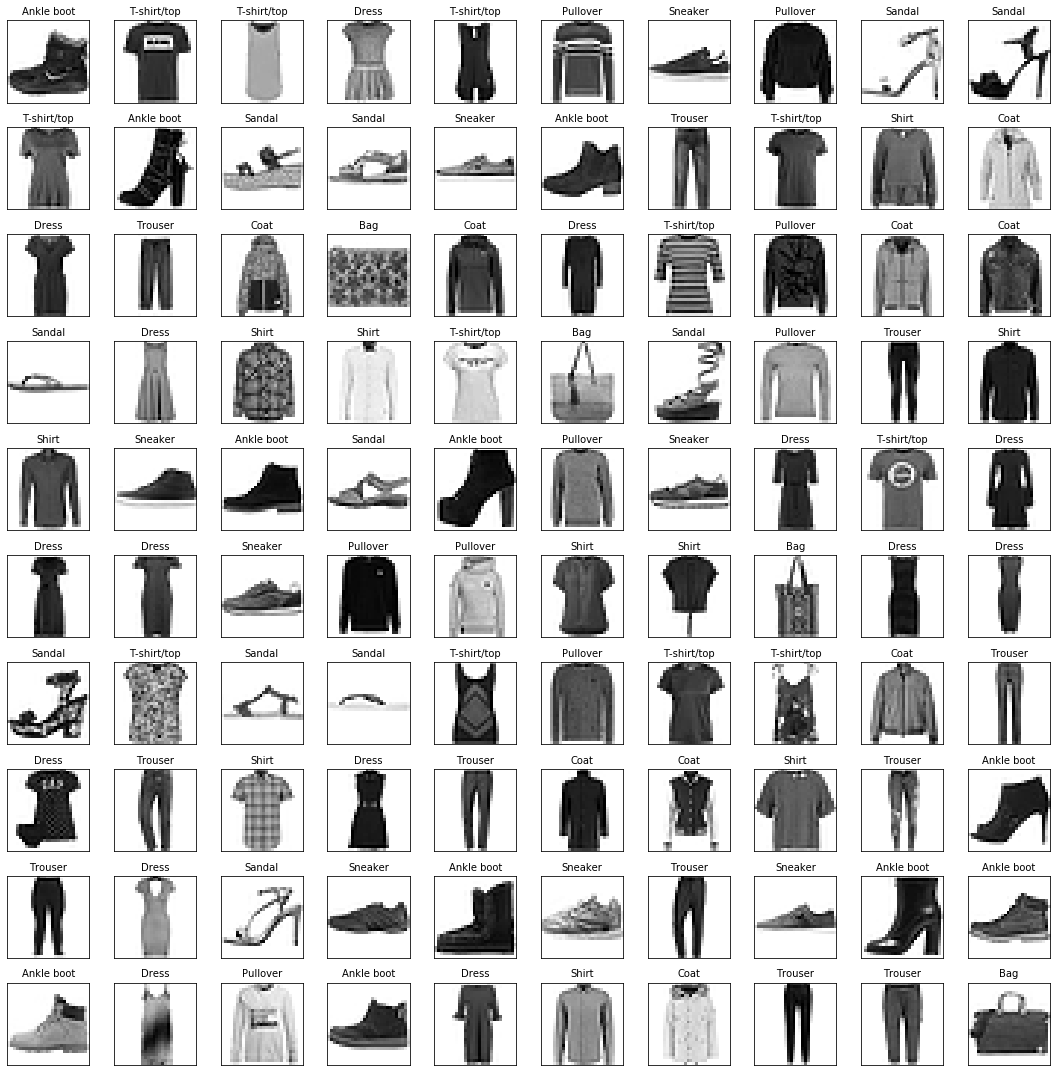

In [27]:
print(train_images.shape)  # shape函數表示張量的形狀: (張數, 圖高, 圖寬)

# reshape the images to 4D tensors
# train_data = np.asarray(train_images, dtype=float)
train_data = np.expand_dims(train_images, axis=-1)  # 增加一維, 灰階=1，即(張數, 圖高, 圖寬, 通道數), 參攷
print(train_data.shape)  # tensor: (張數, 圖高, 圖寬, 通道數)

# 秀出100張測試圖片
tf2tools.plot_Images(train_data[:100],
                     labels=train_labels[:100],
                     rows=10,
                     figsize=(15, 15))
# 1-26

#### 參攷: https://docs.scipy.org/doc/numpy/reference/generated/numpy.expand_dims.html

(28, 28, 1)
(1, 28, 28, 1)


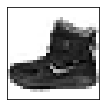

In [28]:
# 參攷 https://www.novatec-gmbh.de/en/blog/keras-data-augmentation-for-cnn/
# 秀出一張圖片
img = train_data[0]
print(img.shape)                      # shape函數表示張量的形狀: (圖高, 圖寬, 通道數)
img1 = img.reshape((1,) + img.shape)  # reshape函數重新定義了原張量的維度, 即(張數, 圖高, 圖寬, 通道數)
print(img1.shape)

tf2tools.plot_Images(img1, figsize=(3, 3))
# 1-27

#### 參攷: https://www.tensorflow.org/api_docs/python/tf/reshape

## Shift
random_shift allows you to randomly shift by a given fraction of the imagesize in each direction.
Here we specify wrg=0.1 and hrg=0.2.
That means that we shift up to 0.2 x imagesize (0.2 x 28 = 5.6) pixel up or down and up to 0.1 x imagesize (0.1 x 28 = 2.8) pixel left or right.

In all transformer functions you can specify row_axis, col_axis and channel_axis according to the array of images you pass into the function.

<table style="height: 50px; width: 100%; margin-left: auto; margin-right: auto;" border="2" cellpadding="3" cellspacing="1" style="border: 3px solid #FFAE7F; border-collapse: collapse;">
<tbody>
<tr>
<th style="background-color: #cceeff; text-align: center; width: 25%;"><font size=5>Input</font></th>
<th style="background-color: #e6ccff; text-align: center; width: 50%;"><font size=5>Process</font></th>
<th style="background-color: #fff5cc; text-align: center; width: 25%;"><font size=5>Output</font></th>
</tr>
<tr>
<td style="background-color: #cceeff; text-align: center; width: 25%; border: 2px dashed red; word-wrap:break-word;">
<font size=5>
img
</font>
&nbsp;
</td>
<td style="background-color: #e6ccff; text-align: center; width: 50%; border: 2px dashed red;">
<font color=Red size=5>
preprocessing.image.random_shift( )
</font>
&nbsp;
</td>
<td style="background-color: #fff5cc; text-align: center; width: 25%; border: 2px dashed red; word-wrap:break-word;">
<font color=Purple size=5>
img_shifted
</font>
&nbsp;
</td>
</tr>
</tbody>
</table>

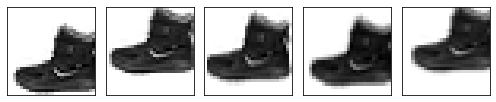

In [29]:
# 秀出5張 shift 圖片
img_shifted = [ preprocessing.image.random_shift(
    img,                   # 輸入張量，必須是3維: (圖高, 圖寬, 通道數)
    wrg=0.1,               # width shift range, 寬度偏移範圍，作為寬度的浮動部分
    hrg=0.2,               # height shift range, 高度移動範圍，作為高度的浮動部分
    row_axis=0,            # 輸入張量中的行的軸索引
    col_axis=1,            # 輸入張量中的列的軸索引
    channel_axis=2,        # 輸入張量中的通道的軸的索引
    fill_mode='constant',  # 輸入的邊界之外的點根據給定的模式{常數}中的一個填充
    cval=0.                # 如果mode='constant'，則用於輸入邊界以外的點的值
) for _ in range(5) ]

tf2tools.plot_Images(img_shifted, figsize=(7, 7))
# 1-28

#### 參攷: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/random_shift

## Rotation
With the random_rotation transformer we can rotate the image randomly by up to x degrees clockwise or counterclockwise.
Here we specify a maximum rotation of 20 degrees.

<table style="height: 50px; width: 100%; margin-left: auto; margin-right: auto;" border="2" cellpadding="3" cellspacing="1" style="border: 3px solid #FFAE7F; border-collapse: collapse;">
<tbody>
<tr>
<th style="background-color: #cceeff; text-align: center; width: 25%;"><font size=5>Input</font></th>
<th style="background-color: #e6ccff; text-align: center; width: 50%;"><font size=5>Process</font></th>
<th style="background-color: #fff5cc; text-align: center; width: 25%;"><font size=5>Output</font></th>
</tr>
<tr>
<td style="background-color: #cceeff; text-align: center; width: 25%; border: 2px dashed red; word-wrap:break-word;">
<font size=5>
img
</font>
&nbsp;
</td>
<td style="background-color: #e6ccff; text-align: center; width: 50%; border: 2px dashed red;">
<font color=Red size=5>
preprocessing.image.random_rotation( )
</font>
&nbsp;
</td>
<td style="background-color: #fff5cc; text-align: center; width: 25%; border: 2px dashed red; word-wrap:break-word;">
<font color=Purple size=5>
img_rotated
</font>
&nbsp;
</td>
</tr>
</tbody>
</table>

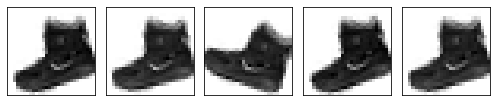

In [30]:
# 秀出5張 rotate 圖片
img_rotated = [ preprocessing.image.random_rotation(
    img,                   # 輸入張量，必須是3維
    rg=20,                 # 旋轉範圍，單位角度
    row_axis=0,            # 輸入張量中的行的軸索引
    col_axis=1,            # 輸入張量中的列的軸索引
    channel_axis=2,        # 輸入張量中的通道的軸的索引
    fill_mode='constant',  # 輸入的邊界之外的點根據給定的模式{常數}中的一個填充
    cval=0.                # 如果mode='constant'，則用於輸入邊界以外的點的值
) for _ in range(5) ]

tf2tools.plot_Images(img_rotated, figsize=(7, 7))
# 1-29

#### 參攷: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/random_rotation

## Shear
The random_shear functions shears an image with a random shearing angle that is calculated from the given `intensity'.

Note that shearing is different from just rotation since it deforms the given image by multiplying it with the following transformation matrix
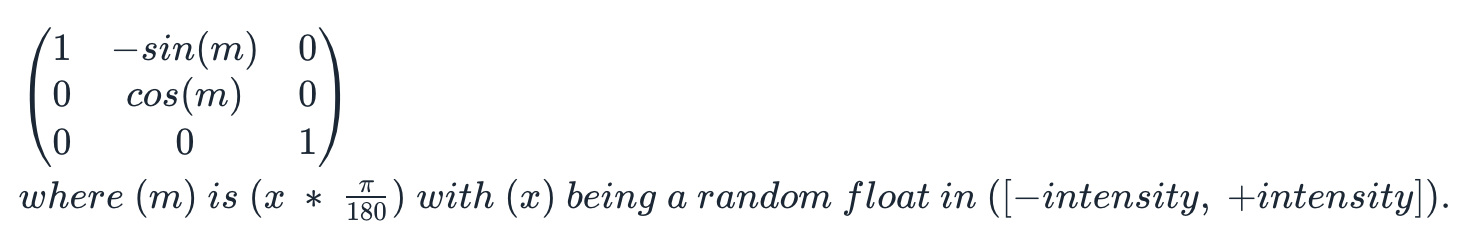

<table style="height: 50px; width: 100%; margin-left: auto; margin-right: auto;" border="2" cellpadding="3" cellspacing="1" style="border: 3px solid #FFAE7F; border-collapse: collapse;">
<tbody>
<tr>
<th style="background-color: #cceeff; text-align: center; width: 25%;"><font size=5>Input</font></th>
<th style="background-color: #e6ccff; text-align: center; width: 50%;"><font size=5>Process</font></th>
<th style="background-color: #fff5cc; text-align: center; width: 25%;"><font size=5>Output</font></th>
</tr>
<tr>
<td style="background-color: #cceeff; text-align: center; width: 25%; border: 2px dashed red; word-wrap:break-word;">
<font size=5>
img
</font>
&nbsp;
</td>
<td style="background-color: #e6ccff; text-align: center; width: 50%; border: 2px dashed red;">
<font color=Red size=5>
preprocessing.image.random_shear( )
</font>
&nbsp;
</td>
<td style="background-color: #fff5cc; text-align: center; width: 25%; border: 2px dashed red; word-wrap:break-word;">
<font color=Purple size=5>
img_sheared
</font>
&nbsp;
</td>
</tr>
</tbody>
</table>

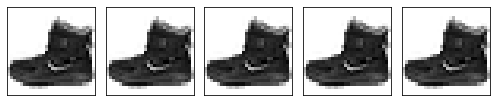

In [31]:
# 秀出5張 shear 圖片
img_sheared = [ preprocessing.image.random_shear(
    img,
    intensity=0.4,    # 角度轉換強度
    row_axis=0,
    col_axis=1,
    channel_axis=2,
    fill_mode='constant',
    cval=0.
) for _ in range(5) ]

tf2tools.plot_Images(img_sheared, figsize=(7, 7))
# 1-30

#### 參攷: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/random_shear

## Zoom
random_zoom zooms in and out of an image. 
But it don’t use the same zooming factor for horizontal and vertical zoom but two independently random values. 
We can specify a minimum (here 0.7) and a maximum value (here 1.3) for the zoom. 
A value bigger than 1.0 zooms in, thus making the object in the image bigger. 
A value smaller than 1.0 zooms out.

<table style="height: 50px; width: 100%; margin-left: auto; margin-right: auto;" border="2" cellpadding="3" cellspacing="1" style="border: 3px solid #FFAE7F; border-collapse: collapse;">
<tbody>
<tr>
<th style="background-color: #cceeff; text-align: center; width: 25%;"><font size=5>Input</font></th>
<th style="background-color: #e6ccff; text-align: center; width: 50%;"><font size=5>Process</font></th>
<th style="background-color: #fff5cc; text-align: center; width: 25%;"><font size=5>Output</font></th>
</tr>
<tr>
<td style="background-color: #cceeff; text-align: center; width: 25%; border: 2px dashed red; word-wrap:break-word;">
<font size=5>
img
</font>
&nbsp;
</td>
<td style="background-color: #e6ccff; text-align: center; width: 50%; border: 2px dashed red;">
<font color=Red size=5>
preprocessing.image.random_zoom( )
</font>
&nbsp;
</td>
<td style="background-color: #fff5cc; text-align: center; width: 25%; border: 2px dashed red; word-wrap:break-word;">
<font color=Purple size=5>
img_zoomed
</font>
&nbsp;
</td>
</tr>
</tbody>
</table>

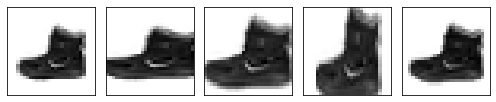

In [32]:
# 秀出5張 zoom 圖片
img_zoomed = [ preprocessing.image.random_zoom(
    img,
    zoom_range=(0.7, 1.3),   # 浮動的元組；縮放範圍的寬度和高度
    row_axis=0,
    col_axis=1,
    channel_axis=2,
    fill_mode='constant',
    cval=0.
) for _ in range(5) ]

tf2tools.plot_Images(img_zoomed, figsize=(7, 7))
# 1-31

#### 參攷: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/random_zoom

## ImageDataGenerator
Now we combine every transformation that we just did in one ImageDataGenerator. 
It is also possibly to allow a flip of the image either horizontally or vertically. 
For now we disallow that option.

When we start the ImageDataGenerator it runs in an endless loop. 
But since we just want a few example we let it run in a for loop and break out of it when we have collected enough examples.

This allows us to create 100 images from just one image.

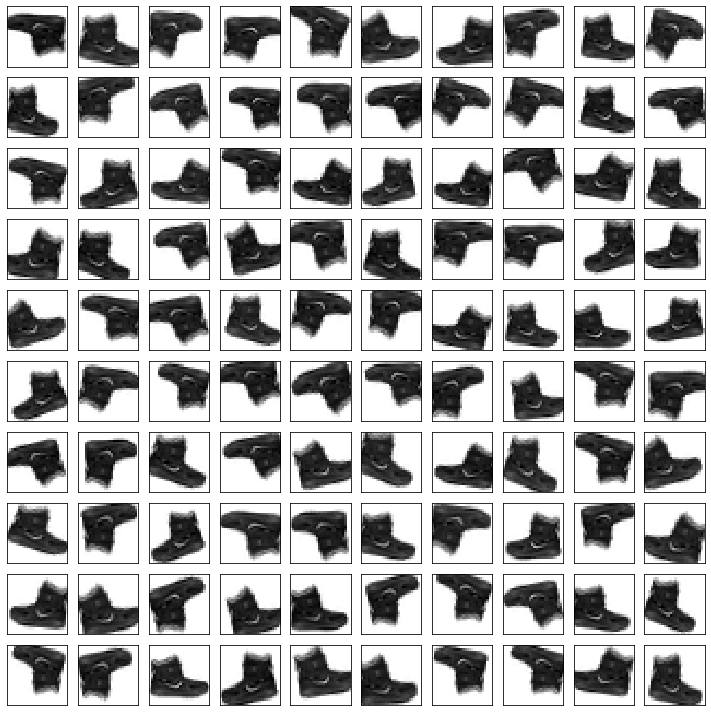

In [33]:
# 資料增強增加訓練樣本
datagen = preprocessing.image.ImageDataGenerator(  # 影像預處理模組
        rotation_range=20,       # 角度值，0~180，影像旋轉
        width_shift_range=0.1,   # 水平平移，相對總寬度的比例
        height_shift_range=0.1,  # 垂直平移，相對總高度的比例
        shear_range=0.5,         # 剪切強度(以弧度逆時針方向剪切角度)
        zoom_range=(0.9, 1.1),   # 隨機縮放範圍
        horizontal_flip=True,    # 隨機水平翻轉
        vertical_flip=True,      # 隨機垂直翻轉
        fill_mode='constant',    # 填充新建立畫素的方法
        cval=0                   # 用於邊界之外的點的值
)

batches = 0
max_batches = 100
img_gen = []

# 產生隨機變換後圖像批量，迴圈是無限產生，需要手動指定終止條件
for x_batch in datagen.flow(img1, batch_size=max_batches):
    img_gen.append(x_batch[0])
    batches += 1
    if batches >= max_batches:
        # generator loops indefinetly
        break
        
tf2tools.plot_Images(img_gen, rows=10, figsize=(10, 10))
# 1-32

#### 參攷: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

***

<font color=#ff99ff size=5><b>將廠商給的圖片檔轉換成Dataset</b>(EagerTensor)</font>
1. `提取資料（Extract）`：將資料從容器（硬碟、雲端等）提取
2. `轉換資料（Transform）`：將資料轉換為模型可讀取的資料，同時進行數據清理等預處理
3. `裝載資料（Load）`：將處理好的資料裝載至加速器（GPU）

In [ ]:
# !pip3 install --user -U pathlib
# !pip3 install --user -U random2

{'bottom_NG': 0, 'bottom_OK': 1, 'top_NG': 2, 'top_OK': 3}

All examples(100%):  20
Train examples(80%): 16
Test examples(20%):   4


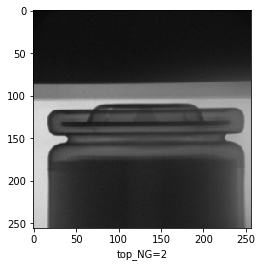

/home/d1075102/tensorflow_code/liBattery/top_NG/20180524XX1L28449.jpg
Original image: (1000, 1000, 3)

Train dataset: (16, 256, 256, 1)
Train type: <class 'tensorflow.python.framework.ops.EagerTensor'>
Test dataset:  (4, 256, 256, 1)


In [34]:
''' ***請勿執行***請勿執行***請勿執行*** '''
import pathlib
import random
import cv2

AUTOTUNE = tf.data.experimental.AUTOTUNE  # 使用自動調節管道找到 prefetching 的最佳參數
batch_size = 100  # 批次
num_classes = 4   # 類別

# --- 提取資料 ---
# 印出目前工作目錄
currentDirectory = os.getcwd()
# print(type(currentDirectory))
data_root_orig = currentDirectory + "/liBattery"
# 抓取檔案
data_root = pathlib.Path(data_root_orig)
all_image_paths = list(data_root.glob('*/*'))
all_image_paths = [str(path) for path in all_image_paths]
# 將檔案打亂
# random.shuffle(all_image_paths)
# print(len(all_image_paths))

# 將資料集分成 訓練: 80% 及 測試: 20%
r80 = (int)(len(all_image_paths) * 0.8)
train_image_paths = all_image_paths[:r80]      # 80%
test_image_paths = all_image_paths[r80:]       # 20%

train_image_count = len(train_image_paths)
test_image_count = len(test_image_paths)
# print(train_image_count)
# print(test_image_count)

# 列出目錄名稱=>標籤
label_names = sorted(dirs.name for dirs in data_root.glob('*/') if dirs.is_dir())
# print(label_names)

# 為每個標籤編索引號(index)
label_to_index = dict((name, index) for index, name in enumerate(label_names))
print(label_to_index)
print()

# 創建一個list，包含每個圖像的標籤索引
all_image_labels = [label_to_index[pathlib.Path(path).parent.name] for path in all_image_paths]
train_image_labels = all_image_labels[:r80]      # 80%
test_image_labels = all_image_labels[r80:]       # 20%
print('All examples(100%): ', len(all_image_labels))
print('Train examples(80%):', len(train_image_labels))
print('Test examples(20%):  ', len(test_image_labels))

# 秀出一張圖
tf2tools.show_img(train_image_paths[0], train_image_labels[0], label_names)
print(train_image_paths[0])
img = cv2.imread(train_image_paths[0])
print('Original image:', img.shape)
print()

# --- 轉換資料 ---
# 使用 from_tensor_slices 方法將圖像數組切片，得到一個圖像數據集
train_path_ds = tf.data.Dataset.from_tensor_slices(train_image_paths)
test_path_ds = tf.data.Dataset.from_tensor_slices(test_image_paths)

# 創建一個新的數據集，通過在路徑數據集上映射 preprocess_image 來動態加載和格式化圖片
train_image_ds = train_path_ds.map(tf2tools.load_and_preprocess_image, num_parallel_calls=AUTOTUNE).cache()
test_image_ds = test_path_ds.map(tf2tools.load_and_preprocess_image, num_parallel_calls=AUTOTUNE).cache()

# 使用 from_tensor_slices 方法創建一個標籤數據集
train_label_ds = tf.data.Dataset.from_tensor_slices(tf.cast(train_image_labels, tf.int64))
test_label_ds = tf.data.Dataset.from_tensor_slices(tf.cast(test_image_labels, tf.int64))

# 由於這些數據集順序相同，可將它們打包在一起得到 (圖片,標籤) 數據集
train_image_label_ds = tf.data.Dataset.zip((train_image_ds, train_label_ds))
test_image_label_ds = tf.data.Dataset.zip((test_image_ds, test_label_ds))

# 將這對數組切片
train_ds = tf.data.Dataset.from_tensor_slices((train_image_paths, train_image_labels))
test_ds = tf.data.Dataset.from_tensor_slices((test_image_paths, test_image_labels))

train_image_label_ds = train_ds.map(tf2tools.load_and_preprocess_from_path_label).cache()
test_image_label_ds = test_ds.map(tf2tools.load_and_preprocess_from_path_label).cache()

# 設置一個和數據集大小一致的 shuffle buffer size（隨機緩衝區大小）以保證數據
train_ds = train_image_label_ds.shuffle(buffer_size=train_image_count)
train_ds = train_ds.batch(batch_size)

test_ds = test_image_label_ds.batch(batch_size)

train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.prefetch(buffer_size=AUTOTUNE)

train_image_batch, train_label_batch = next(iter(train_ds))
test_image_batch, test_label_batch = next(iter(test_ds))

train_label_batch = to_categorical(train_label_batch, num_classes)
test_label_batch = to_categorical(test_label_batch, num_classes)

print('Train dataset:', train_image_batch.shape)
print('Train type:', type(train_image_batch))
print('Test dataset: ', test_image_batch.shape)
# 1-33

***

<font color=#ff99ff size=60><b>Model</b></font>
# Model
[Back](#Menu)

***

## MLP 架構圖 (對照組)
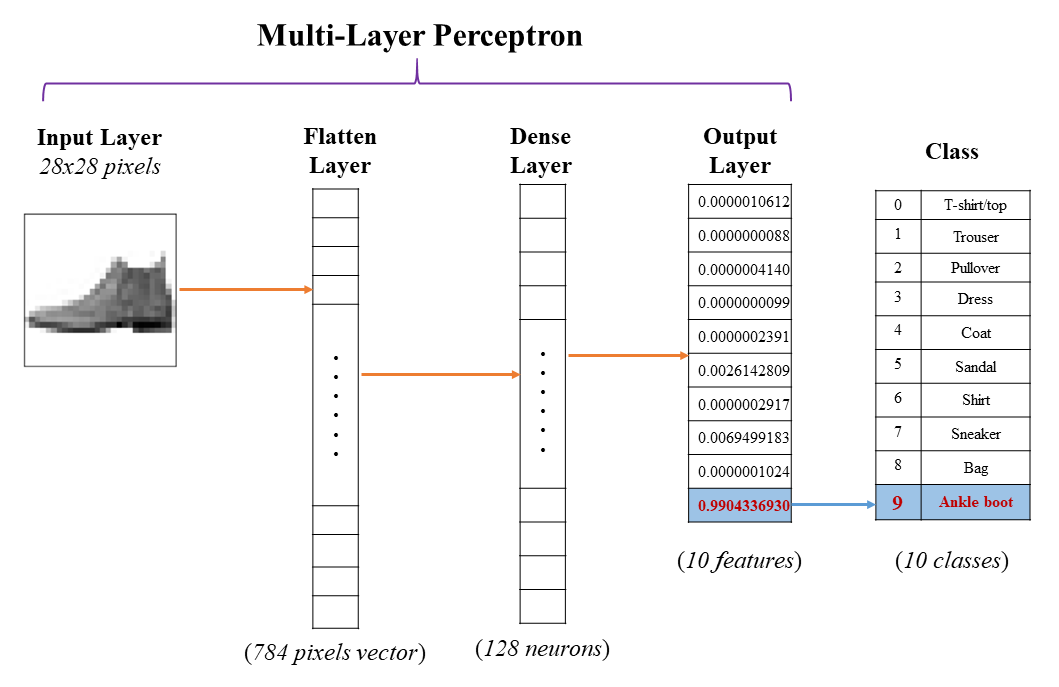

## CNN架構圖
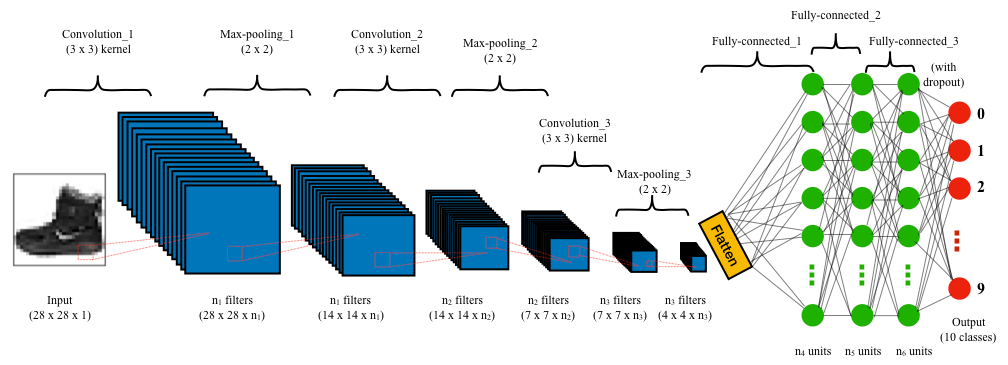

### Set up the layers

The basic building block of a neural network is the *layer*. Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as `tf.keras.layers.Dense`, have parameters that are learned during training.

<font color=#ff99ff size=5><b>Keras 模型構建包括5個步驟</b>：</font>
1. `定義（define）`
2. `編譯（compile）`
3. `訓練（fit）`
4. `評估（evaluate）`
5. `預測（prediction）`

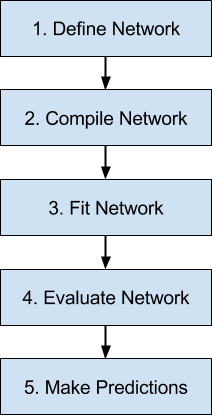

<font color=#ff0000 size=30><b>Don't do this cell</b>&#8681;</font>

In [ ]:
''' 此為[對照組]***不要執行***不要執行***不要執行*** '''
# MLP序列
train_shape = train_images.shape[1:]  # 擷取訓練圖像的形狀
print(train_images.shape)  # 即(張數, 圖高, 圖寬)
print(train_shape)         # 即(圖高, 圖寬)

num_classes = len(class_names)  # 擷取類別總數

# 定義一個簡單的序列（sequential）模型，多個網路層的線性堆疊，添加相應層次結構
def create_model():
    model = Sequential([  # 參攷[1]
        Flatten(input_shape=train_shape, 
        name='flatten'),  # 將輸入展平，不影響批量大小，input_shape：輸入數據的形狀, 參攷[2]
        # 在第一層之後，就不再需要指定輸入的尺寸
        Dense(units=512,
              activation='relu',
              kernel_initializer='normal',
              bias_initializer='zeros',
              name='fc1'),  # 全連接層，units：神經元數量, activation：指定激活函數, 參攷[3]
        Dropout(rate=0.2, name='dropout1'),  # 防止過擬合 overfitting, 參攷 [4]
        Dense(units=256, activation='relu', name='fc2'),
        Dropout(rate=0.2, name='dropout2'),
        Dense(units=num_classes,
              activation='softmax', 
              name='output')  # 參攷 [6]
    ])

    # Compile the model
    model.compile(optimizer='adam',  # Optimizer, 基於數據及損失函數來更新模型, 參攷[7, 8]
                  loss='sparse_categorical_crossentropy',  # Loss function, 希望轉向正確的方向並最小化此函數, 參攷[9]
                  metrics=['accuracy'])  # 用於監視訓練和測試步驟, 參攷[10]

    return model
# 2-1

<font color=#00ff00 size=30><b>Do this cell</b>&#8681;</font>

<table style="height: 50px; width: 100%; margin-left: auto; margin-right: auto;" border="2" cellpadding="3" cellspacing="1" style="border: 3px solid #FFAE7F; border-collapse: collapse;">
<tbody>
<tr>
<th style="background-color: #cceeff; text-align: center; width: 25%;"><font size=5>Input</font></th>
<th style="background-color: #e6ccff; text-align: center; width: 50%;"><font size=5>Process</font></th>
<th style="background-color: #fff5cc; text-align: center; width: 25%;"><font size=5>Output</font></th>
</tr>
<tr>
<td style="background-color: #cceeff; text-align: center; width: 25%; border: 2px dashed red; word-wrap:break-word;">
<font size=5>
train_shape
</font>
&nbsp;
</td>
<td style="background-color: #e6ccff; text-align: center; width: 50%; border: 2px dashed red;">
<font color=Red size=5>
Sequential( )...Conv2D( )...MaxPool2D( )...Dropout( )...Flatten( )...Dense( )...
</font>
&nbsp;
</td>
<td style="background-color: #fff5cc; text-align: center; width: 25%; border: 2px dashed red; word-wrap:break-word;">
<font color=Purple size=5>
model
</font>
&nbsp;
</td>
</tr>
</tbody>
</table>

In [35]:
# CNN序列
train_shape = (train_images.shape[1:] + (1,))  # 擷取訓練圖像的形狀並加通道數=1
print(train_images.shape)  # 即(張數, 圖高, 圖寬)
print(train_shape)         # 即(圖高, 圖寬, 通道數)

num_classes = len(class_names)  # 擷取類別總數

# del model  # 刪除模型

# 定義一個簡單的序列（sequential）模型，多個網路層的線性堆疊，添加相應層次結構
def cnn_model():
    model = Sequential([  # 參攷[1]
        Conv2D(filters=128,
               kernel_size=3,
               strides=1, 
               padding='same', 
               input_shape=train_shape, 
               name='conv1'),  # input_shape：輸入數據的形狀, 參攷[2]
        BatchNormalization(axis=-1, 
                           momentum=0.9, 
                           epsilon=1e-6, 
                           name='bn1'),  # 參攷[11]
        MaxPool2D(pool_size=2, 
                  strides=2, 
                  padding='same', 
                  name='maxpool1'),  # 參攷[12]
        Activation(activation='relu'),

        Conv2D(filters=256, 
               kernel_size=3, 
               strides=1, 
               padding='same', 
               name='conv2'),
        BatchNormalization(axis=-1, 
                           momentum=0.9, 
                           epsilon=1e-6, 
                           name='bn2'),
        MaxPool2D(pool_size=2, 
                  strides=2, 
                  padding='same', 
                  name='maxpool2'),
        Activation(activation='relu'),

        Conv2D(filters=512, 
               kernel_size=3, 
               strides=1, 
               padding='same', 
               name='conv3'),
        BatchNormalization(axis=-1, 
                           momentum=0.9, 
                           epsilon=1e-6, 
                           name='bn3'),
        MaxPool2D(pool_size=2, 
                  strides=2, 
                  padding='same', 
                  name='maxpool3'),
        Activation(activation='relu'),

        Flatten(name='flatten'),  # 將輸入展平，不影響批量大小

        Dense(units=512,
              activation='relu', 
              kernel_initializer='uniform',  # 正交初始化權重orthogonal
              bias_initializer=initializers.constant(0.1),    # 初始化偏置向量
              name='fc1'),  # 全連接層，units：神經元數量, activation：指定激活函數, 參攷[3]
        # Dropout(rate=0.1, name='dropoutfc1'),  # 防止過擬合 overfitting, 參攷 [4]

        Dense(units=256, 
              activation='relu', 
              kernel_initializer='uniform',
              bias_initializer=initializers.constant(0.1),
              name='fc2'),
        # Dropout(rate=0.1, name='dropoutfc2'),

        Dense(units=128, 
              activation='relu', 
              kernel_initializer='uniform',
              bias_initializer=initializers.constant(0.1),
              name='fc3'),
        # Dropout(rate=0.1, name='dropoutfc3'),
        
        Dense(units=num_classes,
              activation='softmax', 
              name='output')
    ])

    model.trainable = True
        
    # Compile the model
    model.compile(# optimizer='Adam',      # Optimizer, 基於數據及損失函數來更新模型, 參攷[7]
                  # optimizer=Adagrad(lr=0.01, epsilon=None, decay=0.0),
                  optimizer=Adam(lr=1e-4,
                                 beta_1=0.9,
                                 beta_2=0.999,
                                 epsilon=None,
                                 decay=0.0,
                                 amsgrad=False),  # 參攷[8]
                  loss='sparse_categorical_crossentropy',  # Loss function, 希望轉向正確的方向並最小化此函數, 參攷[9]
                  metrics=['accuracy'])  # 用於監視訓練和測試步驟, 參攷[10]

    return model
# 2-2

(60000, 28, 28)
(28, 28, 1)


#### 參攷:
1. https://www.tensorflow.org/api_docs/python/tf/keras/Sequential
2. https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten
3. https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense
4. https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout
5. https://www.tensorflow.org/api_docs/python/tf/keras/layers/ReLU
6. https://www.tensorflow.org/api_docs/python/tf/keras/layers/Softmax
7. https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile
8. https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam
9. https://www.tensorflow.org/api_docs/python/tf/keras/losses/sparse_categorical_crossentropy
10. https://www.tensorflow.org/api_docs/python/tf/keras/metrics/Accuracy
11. https://www.tensorflow.org/api_docs/python/tf/keras/layers/BatchNormalization
12. https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D

In [36]:
# 創建一個基本的模型實例
model = cnn_model()
# 2-3

The first layer in this network, `tf.keras.layers.Flatten`, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two `tf.keras.layers.Dense` layers. These are densely connected, or fully connected, neural layers. The first `Dense` layer has 128 nodes (or neurons). The second (and last) layer is a 10-node *softmax* layer that returns an array of 10 probability scores that sum to 1. Each node contains a score that indicates the probability that the current image belongs to one of the 10 classes.

### Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's *compile* step:

* *Loss function* —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* *Optimizer* —This is how the model is updated based on the data it sees and its loss function.
* *Metrics* —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

In [37]:
# 顯示模型的結構
model.summary()    # 參攷[1]
len(model.layers)  # 參攷[2]
# 2-4

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 28, 28, 128)       1280      
_________________________________________________________________
bn1 (BatchNormalization)     (None, 28, 28, 128)       512       
_________________________________________________________________
maxpool1 (MaxPooling2D)      (None, 14, 14, 128)       0         
_________________________________________________________________
activation (Activation)      (None, 14, 14, 128)       0         
_________________________________________________________________
conv2 (Conv2D)               (None, 14, 14, 256)       295168    
_________________________________________________________________
bn2 (BatchNormalization)     (None, 14, 14, 256)       1024      
_________________________________________________________________
maxpool2 (MaxPooling2D)      (None, 7, 7, 256)         0

17

#### 參攷：
1. https://www.tensorflow.org/api_docs/python/tf/keras/Model#summary
2. https://www.tensorflow.org/api_docs/python/tf/keras/layers/Layer

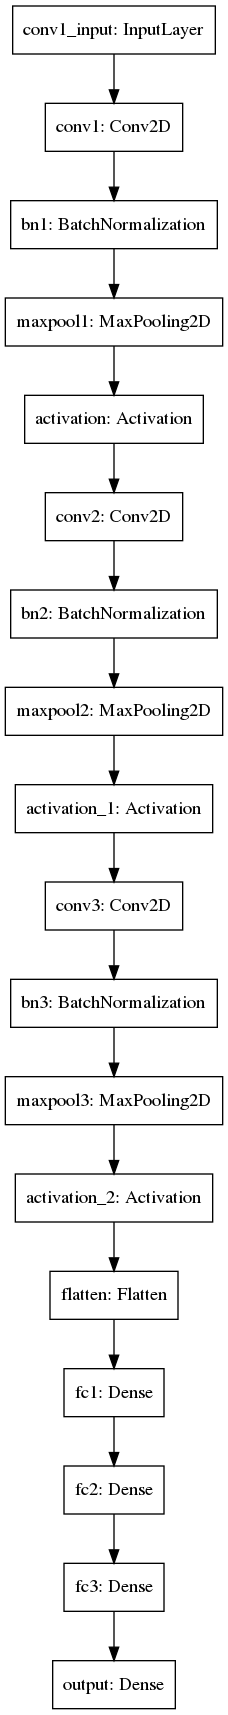

In [38]:
# Converts a Keras model to graph(dot format) and save to a file
plot_model(model, to_file='cnn_model.png')  # 參攷
# 2-5

#### 參攷: https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model

## Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the `test_images` array. Verify that the predictions match the labels from the `test_labels` array.

To start training,  call the `model.fit` method—so called because it "fits" the model to the training data:

### 在訓練期間保存模型（以 checkpoints 形式保存）
您可以使用訓練好的模型而無需從頭開始重新訓練，或在您打斷的地方開始訓練，以防止訓練過程沒有保存。

`tf.keras.callbacks.ModelCheckpoint` 允許在訓練的過程中和結束時回調保存的模型。

### Checkpoint 回調用法
創建一個只在訓練期間保存權重的 `tf.keras.callbacks.ModelCheckpoint` 回調：

<table style="height: 50px; width: 100%; margin-left: auto; margin-right: auto;" border="2" cellpadding="3" cellspacing="1" style="border: 3px solid #FFAE7F; border-collapse: collapse;">
<tbody>
<tr>
<th style="background-color: #cceeff; text-align: center; width: 25%;"><font size=5>Input</font></th>
<th style="background-color: #e6ccff; text-align: center; width: 50%;"><font size=5>Process</font></th>
<th style="background-color: #fff5cc; text-align: center; width: 25%;"><font size=5>Output</font></th>
</tr>
<tr>
<td style="background-color: #cceeff; text-align: center; width: 25%; border: 2px dashed red; word-wrap:break-word;">
<font size=5>
x=train_cnn_images,
y=train_labels
</font>
&nbsp;
</td>
<td style="background-color: #e6ccff; text-align: center; width: 50%; border: 2px dashed red;">
<font color=Red size=5>
model.fit( ) 
</font>
&nbsp;
</td>
<td style="background-color: #fff5cc; text-align: center; width: 25%; border: 2px dashed red; word-wrap:break-word;">
<font color=Purple size=5>
history
</font>
&nbsp;
</td>
</tr>
</tbody>
</table>

In [39]:
# 資料處理: reshape the images to 4D tensors[只需做一次]
train_cnn_images = np.expand_dims(train_images, axis=-1)  # 增加一維，灰階=1, (張數, 圖高, 圖寬, 通道數)
test_cnn_images = np.expand_dims(test_images, axis=-1)    # 增加一維
print(train_cnn_images.shape)
print(test_cnn_images.shape)
print()
# 2-6

(60000, 28, 28, 1)
(10000, 28, 28, 1)



In [40]:
# 設定checkpoint目錄
checkpoint_dir = "training_1"
# 若目錄不存在，則新建
if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)

checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# 創建一個保存模型權重的callback
cp_callback = callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                        save_weights_only=True,  # save_best_only=True
                                        verbose=1)

# 使用新的回調訓練模型, epochs=10, 輸出至 history, 建議使用 GPU
history = model.fit(x=train_cnn_images,
                    y=train_labels,
                    epochs=10,
                    validation_data=(test_cnn_images, test_labels),
                    callbacks=[cp_callback],
                    use_multiprocessing=True)  # 通過回調訓練, 參攷

# 可能會生成與保存優化程序狀態相關的警告, 是防止過時使用=>可以忽略
# 2-7

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
59968/60000 [============================>.] - ETA: 0s - loss: 0.3750 - accuracy: 0.8646
Epoch 00001: saving model to training_1/cp.ckpt
60000/60000 [==============================] - 16s 260us/sample - loss: 0.3750 - accuracy: 0.8646 - val_loss: 0.3181 - val_accuracy: 0.8831
Epoch 2/10
59904/60000 [============================>.] - ETA: 0s - loss: 0.2476 - accuracy: 0.9095
Epoch 00002: saving model to training_1/cp.ckpt
60000/60000 [==============================] - 14s 227us/sample - loss: 0.2475 - accuracy: 0.9095 - val_loss: 0.2568 - val_accuracy: 0.9071
Epoch 3/10
59936/60000 [============================>.] - ETA: 0s - loss: 0.2045 - accuracy: 0.9241
Epoch 00003: saving model to training_1/cp.ckpt
60000/60000 [==============================] - 14s 227us/sample - loss: 0.2045 - accuracy: 0.9241 - val_loss: 0.2245 - val_accuracy: 0.9185
Epoch 4/10
59904/60000 [============================>.] - ETA: 0s - loss: 0.1744 - acc

#### 參攷: https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit

In [41]:
# 秀出 checkpoint 檔案
# checkpoint_dir = "training_1"
!ls {checkpoint_dir}

# 刪除目錄
# os.system("rm -rf training_1")
# 2-8

checkpoint		     cp.ckpt.data-00001-of-00002
cp.ckpt.data-00000-of-00002  cp.ckpt.index


### 上述代碼將權重存儲到 checkpoint -- 格式化文件的集合中，這些文件僅包含二進位格式的訓練權重。
#### Checkpoints 包含：
* 一個或多個包含模型權重的分片 
* 索引文件，指示哪些權重存儲在哪個分片中。

創建一個新的**未經訓練的模型**。  
僅恢復模型的權重時，必須具有與原始模型具有相同網路結構的模型。  
由於模型具有相同的結構，可以`共享權重`，儘管它是模型的不同實例。  
現在重建一個新的未經訓練的模型，並在測試集上進行__評估__。  
未經訓練的模型將在機會水平（chance levels）上執行（準確度約為10％）

<table style="height: 50px; width: 100%; margin-left: auto; margin-right: auto;" border="2" cellpadding="3" cellspacing="1" style="border: 3px solid #FFAE7F; border-collapse: collapse;">
<tbody>
<tr>
<th style="background-color: #cceeff; text-align: center; width: 25%;"><font size=5>Input</font></th>
<th style="background-color: #e6ccff; text-align: center; width: 50%;"><font size=5>Process</font></th>
<th style="background-color: #fff5cc; text-align: center; width: 25%;"><font size=5>Output</font></th>
</tr>
<tr>
<td style="background-color: #cceeff; text-align: center; width: 25%; border: 2px dashed red; word-wrap:break-word;">
<font size=5>
x=test_cnn_images, 
y=test_labels
</font>
&nbsp;
</td>
<td style="background-color: #e6ccff; text-align: center; width: 50%; border: 2px dashed red;">
<font color=Red size=5>
model.evaluate( )
</font>
&nbsp;
</td>
<td style="background-color: #fff5cc; text-align: center; width: 25%; border: 2px dashed red; word-wrap:break-word;">
<font color=Purple size=5>
loss, acc
</font>
&nbsp;
</td>
</tr>
</tbody>
</table>

In [42]:
# 創建一個基本模型實例
model = cnn_model()

# 評估模型
loss, acc = model.evaluate(x=test_cnn_images, 
                           y=test_labels, 
                           verbose=2, 
                           use_multiprocessing=True)  # 參攷

print("Untrained model, accuracy: {:5.2f}%".format(100 * acc))
# 2-9

10000/1 - 1s - loss: 2.3418 - accuracy: 0.1000
Untrained model, accuracy: 10.00%


#### 參攷: https://www.tensorflow.org/api_docs/python/tf/keras/Model#evaluate

#### 然後從 checkpoint 加載權重並重新評估（準確度約為92％）

In [43]:
# 加載權重
model.load_weights(checkpoint_path)  # 參攷

# 重新評估模型
loss, acc = model.evaluate(x=test_cnn_images, 
                           y=test_labels, 
                           verbose=2,
                           use_multiprocessing=True)

print("Restored model, accuracy: {:5.2f}%".format(100 * acc))
# 2-10

10000/1 - 1s - loss: 0.3678 - accuracy: 0.9215
Restored model, accuracy: 92.15%


#### 參攷: https://www.tensorflow.org/api_docs/python/tf/keras/models/load_model

#### 如果要進行測試，請重置模型並加載最新的 checkpoint（準確度約為92％）

In [44]:
# 刪除模型
del model

# 創建一個新的模型實例
model = cnn_model()

# 加載之前保存的權重
model.load_weights(checkpoint_path)

# 重新評估模型
loss, acc = model.evaluate(x=test_cnn_images, 
                           y=test_labels, 
                           verbose=2, 
                           use_multiprocessing=True)

print("Restored model, accuracy: {:5.2f}%".format(100 * acc))
# 2-11

10000/1 - 1s - loss: 0.3678 - accuracy: 0.9215
Restored model, accuracy: 92.15%


### 手動保存權重
如何將權重加載到模型中。使用 `Model.save_weights` 方法手動保存它們。  
默認情況下， `tf.keras` 和 `save_weights` 特別使用 TensorFlow checkpoints 格式 .ckpt 附檔名  
和 (保存在 "HDF5" 附檔名為 .h5 保存並序列化模型)

In [45]:
# 保存權重
model.save_weights('./checkpoints/my_checkpoint')  # 參攷

# 創建模型實例
model = cnn_model()

# Restore the weights
model.load_weights('./checkpoints/my_checkpoint')  # 參攷

# Evaluate the model
loss, acc = model.evaluate(x=test_cnn_images, 
                           y=test_labels, 
                           verbose=2, 
                           use_multiprocessing=True)

print("Restored model, accuracy: {:5.2f}%".format(100 * acc))
# 2-12

10000/1 - 1s - loss: 0.3678 - accuracy: 0.9215
Restored model, accuracy: 92.15%


#### 參攷: https://keras.io/models/about-keras-models/

In [46]:
# 秀出 checkpoints 檔案
!ls {"checkpoints"}
# 2-13

checkpoint			   my_checkpoint.data-00001-of-00002
my_checkpoint.data-00000-of-00002  my_checkpoint.index


### 保存整個模型
模型和優化器可以保存到包含其狀態（權重和變量）和模型參數的文件中。  
這可以導出模型，以便在不訪問原始 python 代碼的情況下使用它。  
而且可以通過恢復優化器狀態的方式，從中斷的位置恢復訓練。

保存完整模型會非常有用—可以在 *TensorFlow.js* (HDF5, Saved Model) 加載它們，然後在 web 瀏覽器中訓練和運行它們，  
或者使用 __TensorFlow Lite__ 將它們轉換為在移動設備上運行(HDF5, Saved Model)

#### 將模型保存為HDF5文件
Keras 可以使用 **HDF5** 標準提供基本保存格式。可以將保存的模型視為單個`二進位blob`
#### 參攷: https://tensorflow.google.cn/federated/api_docs/python/tff/simulation/HDF5ClientData?hl=en

In [47]:
# !pip3 install h5py
# 創建一個新的模型實例
new_model = cnn_model()

# 重新訓練模型, epochs=5
new_model.fit(x=train_cnn_images, 
          y=train_labels, 
          epochs=5, 
          use_multiprocessing=True)

# 將整個模型保存為HDF5文件
new_model.save('my_model.h5')
# 2-14

W1106 13:12:53.047582 139673738049344 util.py:144] Unresolved object in checkpoint: (root).optimizer.iter
W1106 13:12:53.048207 139673738049344 util.py:144] Unresolved object in checkpoint: (root).optimizer.beta_1
W1106 13:12:53.048593 139673738049344 util.py:144] Unresolved object in checkpoint: (root).optimizer.beta_2
W1106 13:12:53.048959 139673738049344 util.py:144] Unresolved object in checkpoint: (root).optimizer.decay
W1106 13:12:53.049321 139673738049344 util.py:144] Unresolved object in checkpoint: (root).optimizer.learning_rate
W1106 13:12:53.049692 139673738049344 util.py:152] A checkpoint was restored (e.g. tf.train.Checkpoint.restore or tf.keras.Model.load_weights) but not all checkpointed values were used. See above for specific issues. Use expect_partial() on the load status object, e.g. tf.train.Checkpoint.restore(...).expect_partial(), to silence these warnings, or use assert_consumed() to make the check explicit. See https://www.tensorflow.org/alpha/guide/checkpoints#

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 13s 217us/sample - loss: 0.3693 - accuracy: 0.8668
Epoch 2/5
60000/60000 [==============================] - 12s 208us/sample - loss: 0.2413 - accuracy: 0.9102
Epoch 3/5
60000/60000 [==============================] - 12s 208us/sample - loss: 0.2000 - accuracy: 0.9265
Epoch 4/5
60000/60000 [==============================] - 12s 207us/sample - loss: 0.1708 - accuracy: 0.9369
Epoch 5/5
60000/60000 [==============================] - 13s 208us/sample - loss: 0.1424 - accuracy: 0.9467


In [48]:
# del new_model  # 刪除現有模型

# 重新創建完全相同的模型，包括其權重和優化程序
new_model = models.load_model('my_model.h5')  # 參攷

# 顯示網路結構
new_model.summary()
len(new_model.layers)
# 2-15

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 28, 28, 128)       1280      
_________________________________________________________________
bn1 (BatchNormalization)     (None, 28, 28, 128)       512       
_________________________________________________________________
maxpool1 (MaxPooling2D)      (None, 14, 14, 128)       0         
_________________________________________________________________
activation_12 (Activation)   (None, 14, 14, 128)       0         
_________________________________________________________________
conv2 (Conv2D)               (None, 14, 14, 256)       295168    
_________________________________________________________________
bn2 (BatchNormalization)     (None, 14, 14, 256)       1024      
_________________________________________________________________
maxpool2 (MaxPooling2D)      (None, 7, 7, 256)        

17

#### 參攷: https://keras.io/getting-started/faq/

In [49]:
# 檢查準確率（accuracy）
loss, acc = new_model.evaluate(x=test_cnn_images, 
                               y=test_labels, 
                               verbose=2, 
                               use_multiprocessing=True)

print("Restored model, accuracy: {:5.2f}%".format(100 * acc))
# 2-16

10000/1 - 1s - loss: 0.2730 - accuracy: 0.9148
Restored model, accuracy: 91.48%


#### 從 HDF5文件 顯示各層次名稱及權重等

In [50]:
# 加載模型並對模型進行調整
loaded_model = models.load_model('my_model.h5')

# 修改 model's name
loaded_model._name = 'cnn_model'
loaded_model.summary()
print('Original layers:', len(loaded_model.layers))
print()

# 列印各層名字，權重的形狀
for layer in loaded_model.layers:  # 參攷
    for weight in layer.weights:
        print(layer.name, weight.name, weight.shape)
print()

# 列印單層
layer_name = 'conv1'
print(loaded_model.get_layer(layer_name).name)
# print(loaded_model.get_layer('conv1').get_weights())
print()
# 列印最後一層
print(loaded_model.layers[-1].input)
print(loaded_model.layers[-1].output)
print()

loaded_model._layers.pop(1)   # 刪除第一層
loaded_model._layers.pop(-1)  # 刪除最後一層
loaded_model.summary()
print('After layers:', len(loaded_model.layers))
# 2-17

W1106 13:14:19.885321 139673738049344 training.py:2090] Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?


Model: "cnn_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 28, 28, 128)       1280      
_________________________________________________________________
bn1 (BatchNormalization)     (None, 28, 28, 128)       512       
_________________________________________________________________
maxpool1 (MaxPooling2D)      (None, 14, 14, 128)       0         
_________________________________________________________________
activation_12 (Activation)   (None, 14, 14, 128)       0         
_________________________________________________________________
conv2 (Conv2D)               (None, 14, 14, 256)       295168    
_________________________________________________________________
bn2 (BatchNormalization)     (None, 14, 14, 256)       1024      
_________________________________________________________________
maxpool2 (MaxPooling2D)      (None, 7, 7, 256)         0 

#### 參攷: https://keras.io/getting-started/faq/

In [51]:
# Exports the Trackable object obj to SavedModel format
tf.saved_model.save(model, 'saved_model/')  # 參攷[1-3]
# 2-18

W1106 13:14:30.637647 139673738049344 deprecation.py:506] From /home/d1075102/.local/lib/python3.7/site-packages/tensorflow_core/python/ops/resource_variable_ops.py:1781: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


#### 參攷: 
1. https://www.tensorflow.org/api_docs/python/tf/saved_model/save
2. https://www.tensorflow.org/js/tutorials/conversion/import_saved_model
3. https://www.tensorflow.org/guide/saved_model#overview_of_saving_and_restoring_models

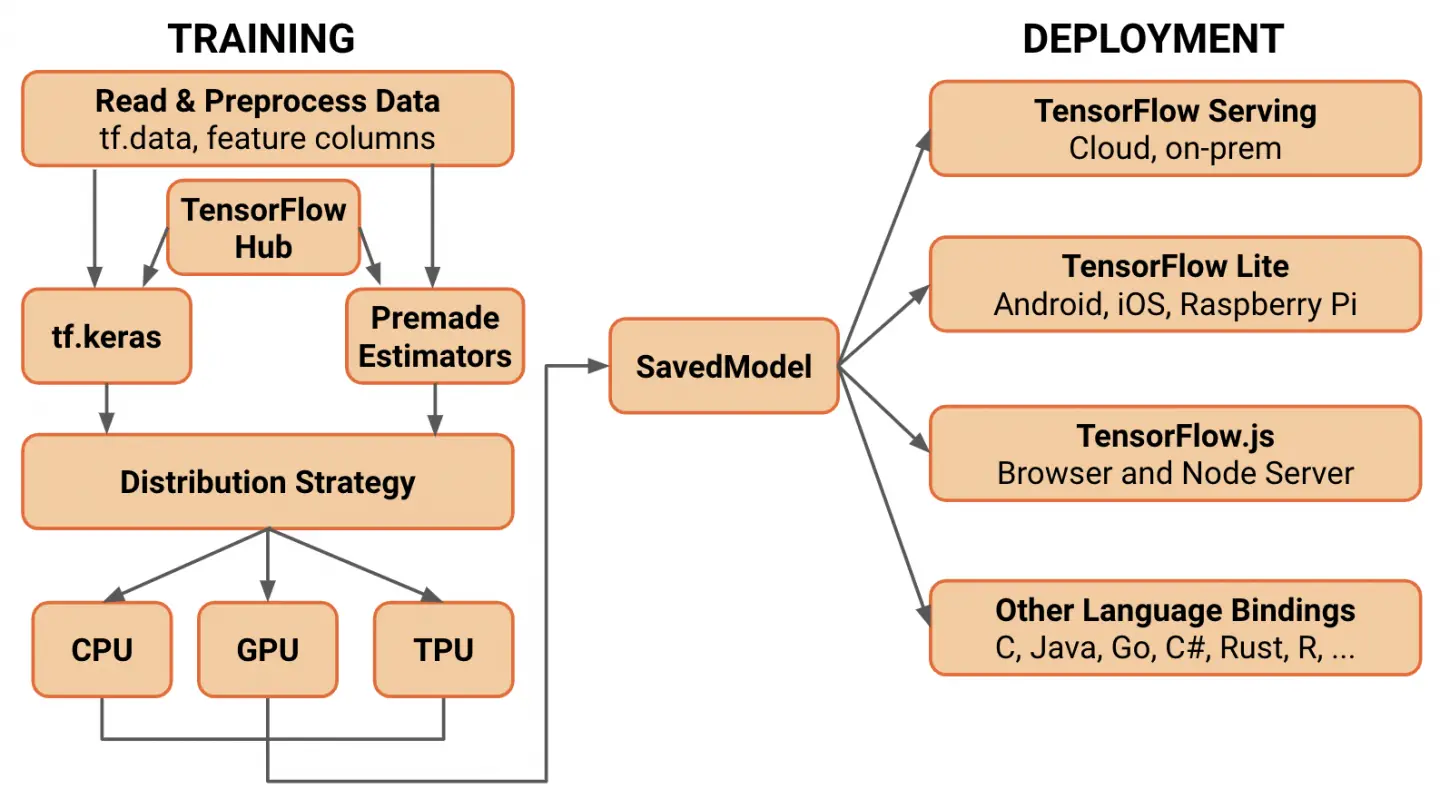

In [52]:
# 秀出 saved_model 檔案
!ls {'saved_model'}

tf2tools.get_size('saved_model')

# 刪除目錄
# os.system("rm -rf saved_model")
# 2-19

assets	saved_model.pb	variables
saved_model

Model size: 396.438 KB
Variables size: 68434.37 KB
Total Size: 68830.809 KB


## Evaluate accuracy

Next, compare how the model performs on the test dataset:

<table style="height: 50px; width: 100%; margin-left: auto; margin-right: auto;" border="2" cellpadding="3" cellspacing="1" style="border: 3px solid #FFAE7F; border-collapse: collapse;">
<tbody>
<tr>
<th style="background-color: #cceeff; text-align: center; width: 25%;"><font size=5>Input</font></th>
<th style="background-color: #e6ccff; text-align: center; width: 50%;"><font size=5>Process</font></th>
<th style="background-color: #fff5cc; text-align: center; width: 25%;"><font size=5>Output</font></th>
</tr>
<tr>
<td style="background-color: #cceeff; text-align: center; width: 25%; border: 2px dashed red; word-wrap:break-word;">
<font size=5>
x=test_cnn_images, 
y=test_labels
</font>
&nbsp;
</td>
<td style="background-color: #e6ccff; text-align: center; width: 50%; border: 2px dashed red;">
<font color=Red size=5>
model.evaluate( )
</font>
&nbsp;
</td>
<td style="background-color: #fff5cc; text-align: center; width: 25%; border: 2px dashed red; word-wrap:break-word;">
<font color=Purple size=5>
test_loss, test_acc
</font>
&nbsp;
</td>
</tr>
</tbody>
</table>

In [53]:
# 評估
test_loss, test_acc = model.evaluate(x=test_cnn_images, 
                                     y=test_labels, 
                                     verbose=2, 
                                     use_multiprocessing=True)  # 參攷

print('\nTest accuracy: {:5.2f}, Loss: {:5.2f}'.format(test_acc, test_loss))
# 2-20

10000/1 - 1s - loss: 0.3678 - accuracy: 0.9215

Test accuracy:  0.92, Loss:  0.26


#### 參攷: https://www.tensorflow.org/api_docs/python/tf/keras/Model#evaluate

## Make predictions

With the model trained, you can use it to make predictions about some images.

It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents *overfitting*. Overfitting is when a machine learning model performs worse on new, previously unseen inputs than on the training data.

<table style="height: 50px; width: 100%; margin-left: auto; margin-right: auto;" border="2" cellpadding="3" cellspacing="1" style="border: 3px solid #FFAE7F; border-collapse: collapse;">
<tbody>
<tr>
<th style="background-color: #cceeff; text-align: center; width: 25%;"><font size=5>Input</font></th>
<th style="background-color: #e6ccff; text-align: center; width: 50%;"><font size=5>Process</font></th>
<th style="background-color: #fff5cc; text-align: center; width: 25%;"><font size=5>Output</font></th>
</tr>
<tr>
<td style="background-color: #cceeff; text-align: center; width: 25%; border: 2px dashed red; word-wrap:break-word;">
<font size=5>
x=test_cnn_images
</font>
&nbsp;
</td>
<td style="background-color: #e6ccff; text-align: center; width: 50%; border: 2px dashed red;">
<font color=Red size=5>
model.predict( )
</font>
&nbsp;
</td>
<td style="background-color: #fff5cc; text-align: center; width: 25%; border: 2px dashed red; word-wrap:break-word;">
<font color=Purple size=5>
predictions
</font>
&nbsp;
</td>
</tr>
</tbody>
</table>

In [54]:
# 預測
predictions = model.predict(x=test_cnn_images, use_multiprocessing=True)  # 參攷
# 2-21

#### 參攷: https://www.tensorflow.org/api_docs/python/tf/keras/Model#predict

Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

<table style="height: 50px; width: 100%; margin-left: auto; margin-right: auto;" border="2" cellpadding="3" cellspacing="1" style="border: 3px solid #FFAE7F; border-collapse: collapse;">
<tbody>
<tr>
<th style="background-color: #cceeff; text-align: center; width: 25%;"><font size=5>Input</font></th>
<th style="background-color: #e6ccff; text-align: center; width: 50%;"><font size=5>Process</font></th>
<th style="background-color: #fff5cc; text-align: center; width: 25%;"><font size=5>Output</font></th>
</tr>
<tr>
<td style="background-color: #cceeff; text-align: center; width: 25%; border: 2px dashed red; word-wrap:break-word;">
<font size=5>
0
</font>
&nbsp;
</td>
<td style="background-color: #e6ccff; text-align: center; width: 50%; border: 2px dashed red;">
<font color=Red size=5>
predictions[ ]
</font>
&nbsp;
</td>
<td style="background-color: #fff5cc; text-align: center; width: 25%; border: 2px dashed red; word-wrap:break-word;">
<font color=Purple size=3>
[1.9726464e-19, 5.6842889e-20, 1.3350342e-19, ..., 9.9999952e-01]
</font>
&nbsp;
</td>
</tr>
</tbody>
</table>

In [55]:
# 秀出 第一個預測結果
predictions[0]
# 2-22

array([1.1161808e-08, 3.5184094e-08, 2.3035463e-08, 8.2175902e-09,
       4.2936954e-08, 8.6568565e-05, 1.1412058e-07, 2.4979927e-06,
       1.0917744e-09, 9.9991071e-01], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

<table style="height: 50px; width: 100%; margin-left: auto; margin-right: auto;" border="2" cellpadding="3" cellspacing="1" style="border: 3px solid #FFAE7F; border-collapse: collapse;">
<tbody>
<tr>
<th style="background-color: #cceeff; text-align: center; width: 25%;"><font size=5>Input</font></th>
<th style="background-color: #e6ccff; text-align: center; width: 50%;"><font size=5>Process</font></th>
<th style="background-color: #fff5cc; text-align: center; width: 25%;"><font size=5>Output</font></th>
</tr>
<tr>
<td style="background-color: #cceeff; text-align: center; width: 25%; border: 2px dashed red; word-wrap:break-word;">
<font size=5>
predictions[0]
</font>
&nbsp;
</td>
<td style="background-color: #e6ccff; text-align: center; width: 50%; border: 2px dashed red;">
<font color=Red size=5>
np.argmax(predictions[ ])
</font>
&nbsp;
</td>
<td style="background-color: #fff5cc; text-align: center; width: 25%; border: 2px dashed red; word-wrap:break-word;">
<font color=Purple size=5>
9
</font>
&nbsp;
</td>
</tr>
</tbody>
</table>

In [56]:
# 返回最大值索引
np.argmax(predictions[0])  # 參攷
# 2-23

9

#### 參攷: https://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html

So, the model is most confident that this image is an ankle boot, or `class_names[9]`. Examining the test label shows that this classification is correct:

In [57]:
# 秀出 相對位置的 標籤(類別編號)
test_labels[0]
# 2-24

9

In [58]:
# 判斷 預測結果 是否相等於 標籤(答案)
np.argmax(predictions[0]) == test_labels[0]
# 2-25

True

In [59]:
# 秀出 類別名稱
class_names[np.argmax(predictions[0])]
# 2-26

'Ankle boot'

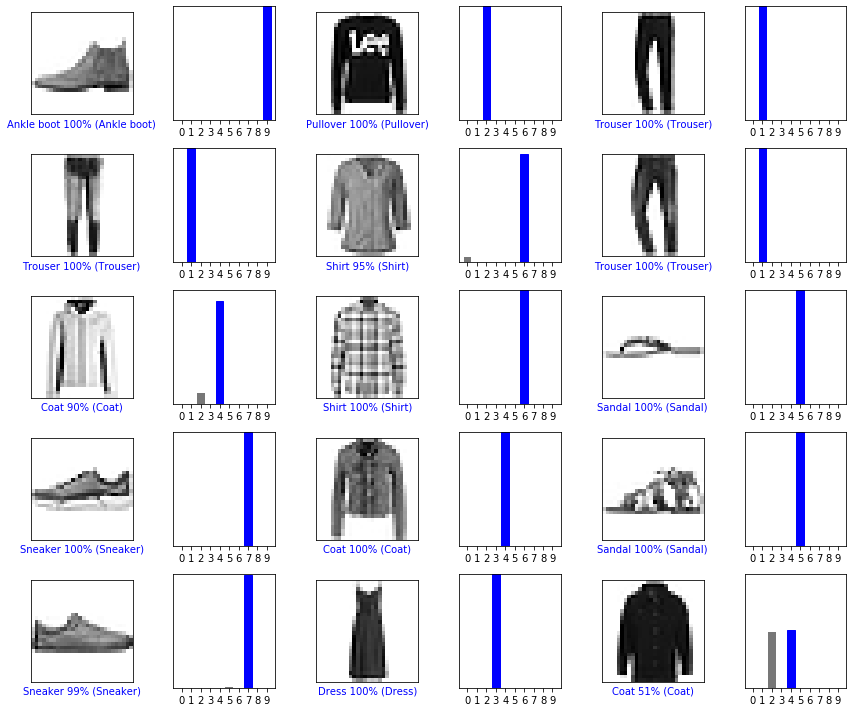

In [60]:
# 預測結果視覺化--15張圖
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
tf2tools.plot_predict(predictions, test_labels, test_images)
# 2-27

***

<font color=#ff99ff size=4><b>CPP call TensorFlow</b></font>...2.0改版中
#### 參攷: https://www.tensorflow.org/api_docs/cc

***

<font color=#ff99ff size=60><b>Analysis</b></font>
# Analysis
[Back](#Menu)

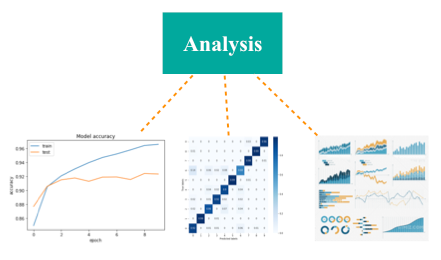

***

### 顯示訓練歷史記錄的trend圖表

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


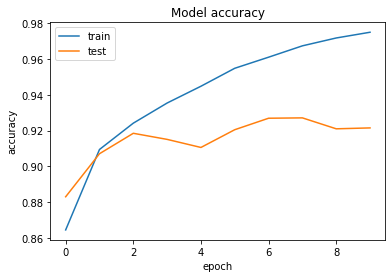

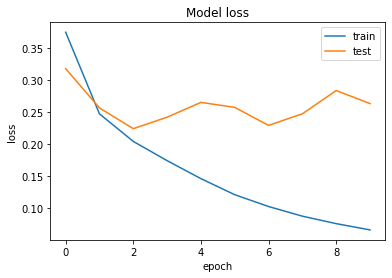

In [61]:
# list all data in history
print(history.history.keys())  # 參攷

# 顯示準確率圖表summarize history for accuracy
key = 'accuracy'
tf2tools.history_plot(history, key)

# 顯示損失函數誤差值圖表summarize history for loss
key = 'loss'
tf2tools.history_plot(history, key)
# 3-1

#### 參攷: https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/

###  顯示混淆矩陣（confusion matrix）

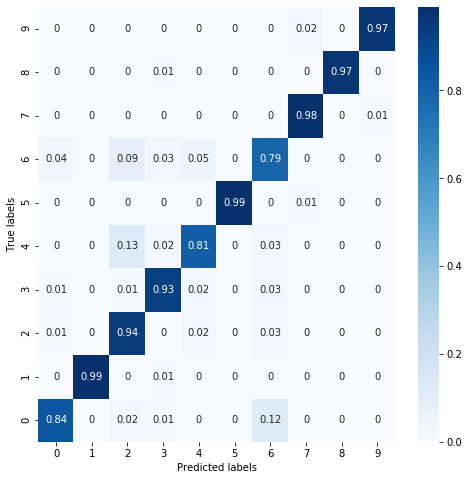

'Shirt'

In [62]:
import seaborn as sns  # 參攷[1]
from sklearn.metrics import confusion_matrix  # 參攷[2]

# predict
y_pred = model.predict_classes(x=test_cnn_images)  # 參攷[3]
# print(y_pred)

# 混淆矩陣：真實值與預測值的對比
# 對角線上的值表示預測正確的數量/比例；非對角線元素是預測錯誤的部分
con_mat = confusion_matrix(test_labels, y_pred)
# print(confusion_matrix(test_labels, y_pred))

con_mat_norm = con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis]  # 歸一化
con_mat_norm = np.around(con_mat_norm, decimals=2)

# plot
figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_norm, annot=True, cmap='Blues')

plt.ylim(0, 10)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

class_names[6]
# 3-2

#### 參攷:
1. https://seaborn.pydata.org/
2. https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
3. https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#predict_classes

### 找出預測錯誤的資料

In [63]:
# 用訓練好的 Model 進行 辨識物體圖片
prediction = model.predict_classes(x=test_cnn_images)
# 顯示 測試圖片集 全部的預測結果
print(prediction)
# 顯示 圖片集 第 340~360 筆的預測結果
print(prediction[340:360])

# 透過 DataFrame 對照表清單, 來顯示 Label 真實數值, 與 AI 預設結果
import pandas as pd  # 參攷[1]

# Pandas.DataFrame 的資料集需要一維陣列, 而 test_labels 本身是二維陣列, 需透過 reshape 轉換為一維陣列
test_labels_onearr = test_labels.reshape(len(test_labels))
# print(test_labels_onearr.shape)
print()

checkList = pd.DataFrame(data={  # 參攷[2]
                         'label': test_labels_onearr,  # Column1 名稱: 欄位值集合 (Label 真實數值)
                         'prediction': prediction      # Column2 名稱: 欄位值集合 (CNN 預測結果)
                         })

# 顯示對照表前 10 筆結果
print(checkList[:10])
print()

# 列出對照表中, prediction 欄位值 不等於 label 欄位值的資料
checkList[checkList.prediction != checkList.label]
# 3-3

[9 2 1 ... 8 1 7]
[4 0 3 1 6 1 9 4 9 9 1 7 0 3 6 0 2 4 8 0]

   label  prediction
0      9           9
1      2           2
2      1           1
3      1           1
4      6           6
5      1           1
6      4           4
7      6           6
8      5           5
9      7           7



,label,prediction
23,9,5
42,3,6
68,9,7
98,4,2
141,0,6
...,...,...
9969,8,4
9972,2,6
9989,4,6
9991,6,3


#### 參攷:
1. https://pandas.pydata.org/
2. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

<table border="1" class="docutils">
<colgroup>
<col width="29%" />
<col width="32%" />
<col width="39%" />
</colgroup>
<tbody valign="top">
<tr class="row-odd"><td>&#160;</td>
<td colspan="2">Actual class (observation)</td>
</tr>
<tr class="row-even"><td rowspan="2">Predicted class
(expectation)</td>
<td>tp (true positive)
Correct result</td>
<td>fp (false positive)
Unexpected result</td>
</tr>
<tr class="row-odd"><td>fn (false negative)
Missing result</td>
<td>tn (true negative)
Correct absence of result</td>
</tr>
</tbody>
</table>
<p>In this context, we can define the notions of precision, recall and F-measure:</p>
<div class="math">
  \[\text{precision} = \frac{tp}{tp + fp}\]
</div>
<div class="math">
  \[\text{recall} = \frac{tp}{tp + fn}\]
</div>
<div class="math">
  \[F_\beta = (1 + \beta^2) \frac{\text{precision} \times \text{recall}}{\beta^2 \text{precision} + \text{recall}}\]
</div>

In [64]:
# demonstration of calculating metrics for a neural network model using sklearn(Scikit-learn)
# Model evaluation: quantifying the quality of predictions, 參攷[1]
# from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score     # 參攷[2]
from sklearn.metrics import precision_score    # 參攷[3]
from sklearn.metrics import recall_score       # 參攷[4]
from sklearn.metrics import f1_score           # 參攷[5]
from sklearn.metrics import cohen_kappa_score  # 參攷[6]
from sklearn.metrics import roc_auc_score      # 參攷[7]
from sklearn.metrics import confusion_matrix   # 參攷[8]

# predict probabilities for test set
y_probs = model.predict(x=test_cnn_images, verbose=0, use_multiprocessing=True)  # 參攷[8]
# predict crisp classes for test set
y_classes = model.predict_classes(x=test_cnn_images, verbose=0)  # 參攷[9]
# reduce to 1d array
# y_probs = y_probs[:, 0]
# y_classes = y_classes[:, 0]

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(test_labels, y_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(test_labels, y_classes, average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(test_labels, y_classes, average='weighted')
print('Recall: %f' % recall)
print()

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(test_labels, y_classes, average='weighted')
print('F1 score: %f' % f1)
print()

# kappa
kappa = cohen_kappa_score(test_labels, y_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
# auc = roc_auc_score(test_labels, y_probs)
# print('ROC AUC: %f' % auc)
# confusion matrix
print()

matrix = confusion_matrix(test_labels, y_classes)
print(matrix)
# 3-4

Accuracy: 0.921500
Precision: 0.924325
Recall: 0.921500

F1 score: 0.921792

Cohens kappa: 0.912778

[[837   0  22  11   3   1 125   0   1   0]
 [  1 987   0   9   1   0   2   0   0   0]
 [ 13   1 940   3  17   0  26   0   0   0]
 [ 10   3  11 928  20   0  28   0   0   0]
 [  1   0 130  22 813   0  34   0   0   0]
 [  0   0   0   0   0 986   0  10   0   4]
 [ 42   0  88  27  49   0 793   0   1   0]
 [  0   0   0   0   0   3   0 983   0  14]
 [  4   2   3   6   3   1   5   2 974   0]
 [  0   0   1   0   0   5   0  20   0 974]]


#### 參攷:
1. https://scikit-learn.org/stable/modules/model_evaluation.html#model-evaluation
2. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
3. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
4. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html
5. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
6. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.cohen_kappa_score.html
7. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html
8. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
9. https://www.tensorflow.org/api_docs/python/tf/keras/Model#predict
10. https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#predict_classes

***

<font color=#ff99ff size=6><b>The end.</b></font>

***

***
***
***

***
***
***

In [ ]:
# !pip3 install -U ipywidgets
# !jupyter nbextension enable --py widgetsnbextension

In [65]:
# 單控制元件 - interact 簡單互動
from __future__ import print_function
from ipywidgets import interact  # 參攷
import ipywidgets as widgets

def f(segx,opt):
    if opt:
        return segx
    else:
        return 1

interact(f, segx=10, opt=True)
# 4-1

interactive(children=(IntSlider(value=10, description='segx', max=30, min=-10), Checkbox(value=True, descripti…

<function __main__.f(segx, opt)>

#### 參攷: https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html#Using-Interact

In [66]:
# 單控制元件 - interact 簡單互動 - 秀圖
from ipywidgets import interact

methods = [None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
           'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
           'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']  # 參攷

def browse_images(images, labels):
    n = len(images)
    def view_image(i):
        idx = i % 18
        plt.imshow(images[i], cmap=plt.cm.gray_r, interpolation=methods[idx])
        plt.title('Test label: %s, interpolation: %s' % (labels[i], methods[idx]))
        plt.show()
    interact(view_image, i=(0, n - 1))

browse_images(test_images, test_labels)
# 4-2

interactive(children=(IntSlider(value=4999, description='i', max=9999), Output()), _dom_classes=('widget-inter…

#### 參攷:
https://matplotlib.org/3.1.0/gallery/images_contours_and_fields/interpolation_methods.html